In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl




In [2]:
#'''
#NAME
#    Custom Colormaps for Matplotlib
#PURPOSE
#    This program shows how to implement make_cmap which is a function that
#    generates a colorbar.  If you want to look at different color schemes,
#    check out https://kuler.adobe.com/create.
#PROGRAMMER(S)
#    Chris Slocum
#REVISION HISTORY
#    20130411 -- Initial version created
#    20140313 -- Small changes made and code posted online
#    20140320 -- Added the ability to set the position of each color
#'''

def make_cmap(colors, position=None, bit=False):
    #'''
    #make_cmap takes a list of tuples which contain RGB values. The RGB
    #values may either be in 8-bit [0 to 255] (in which bit must be set to
    #rue when called) or arithmetic [0 to 1] (default). make_cmap returns
    #a cmap with equally spaced colors.
    #Arrange your tuples so that the first color is the lowest value for the
    #colorbar and the last is the highest.
    #position contains values from 0 to 1 to dictate the location of each color.
    #'''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

In [3]:

# Unstagger velocity output field (U,V,W) into tracer grid (cell centers)
#
# statefile : string with /path/to/state.0000000000.t001.nc

def VeltoTracer(statefile):
    
    StateOut = Dataset(statefile)
    
    Y = StateOut.variables['Y']
    Z = StateOut.variables['Z']
    X = StateOut.variables['X']
    
    Zl = StateOut.variables['Zl']
    U  = StateOut.variables['U']
    V  = StateOut.variables['V']
    W  = StateOut.variables['W']
    
    
    shU = np.shape(U)
    shV = np.shape(V)
    shW = np.shape(W)
    

    Uunstag = np.zeros((shU[0],len(Z),len(Y), len(X)))
    Vunstag = np.zeros((shV[0],len(Z),len(Y), len(X)))
    Wunstag = np.zeros((shW[0],len(Z),len(Y), len(X)))
    
    sh = np.shape(Uunstag)
    
    sh2 = (sh[0],sh[1],sh[2],sh[3])
    
    for ii in np.arange(sh[3]-1):
        
        Uunstag[:,:,:,ii] = (U[:,:,:,ii]+U[:,:,:,ii+1])/2
    
    Uunstag[:,:,:,ii+1] = U[:,:,:,ii]
    
    print('finished U')
    
    for jj in np.arange(sh[2]-1):
    
        Vunstag[:,:,jj,:] = (V[:,:,jj,:]+V[:,:,jj+1,:])/2
    
    Vunstag[:,:,jj+1,:] = V[:,:,jj,:]
    
    print('finished V')
    
    
    for kk in np.arange(sh[1]-1):
    
        Wunstag[:,kk,:,:] = (W[:,kk,:,:]+W[:,kk+1,:,:])/2
    
    Wunstag[:,kk+1,:,:]  = W[:,kk,:,:]
    
    print('finished W')
             

    #Uunstag2 = np.reshape(Uunstag,sh2,order='F') # this line is to change the order from Fortan to C (columns then rows)
    #Vunstag2 = np.reshape(Vunstag,sh2,order='F') # this line is to change the order from Fortan to C (columns then rows)
    #Wunstag2 = np.reshape(Wunstag,sh2,order='F') # this line is to change the order from Fortan to C (columns then rows)
    
    return{'U':Uunstag, 'V':Vunstag ,'W':Wunstag } # to call an individual result do:
                                                    # result = VeltoTracer(bla..)
                                                    # u,v,w = result.get('U'), result.get('V'), result.get('W') 

In [4]:
# Get field from MITgcm netCDF output
#
# statefile : string with /path/to/state.0000000000.t001.nc
# fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)
#
def getField(statefile, fieldname):
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2 
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    



Inquire variable information from output files:

In [5]:

filename = '/ocean/kramosmu/MITgcm/CanyonUpwelling/180x180x35_UpwQuadRampWind_1Tr_LinProfiles/run01/output_0001/state.0000000000.glob.nc'
StateOut = Dataset(filename)

#for dimobj in StateOut.variables.values():
#    print dimobj

filename2 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/180x180x35_UpwQuadRampWind_1Tr_LinProfiles/run01/output_0001/grid.glob.nc'
GridOut = Dataset(filename2)

#for dimobj in GridOut.variables.values():
#    print dimobj

filename3 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/180x180x35_UpwQuadRampWind_1Tr_LinProfiles/run01/output_0001/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3)

#for dimobj in PtracersOut.variables.values():
#    print dimobj

In [6]:
result = VeltoTracer(filename)
u,v,w = result.get('U'), result.get('V'), result.get('W') 



finished U
finished V
finished W


In [7]:
bathy=getField(filename2, 'Depth')

z=StateOut.variables['Z']
print(z[:])
Time=StateOut.variables['T']
print(Time[:])

[   -5.    -15.    -25.    -35.    -45.    -55.    -65.    -75.    -85.
   -95.   -105.   -117.5  -132.5  -147.5  -162.5  -177.5  -192.5  -207.5
  -222.5  -237.5  -252.5  -267.5  -282.5  -297.5  -315.   -335.   -370.
  -420.   -470.   -525.   -605.   -705.   -805.   -905.  -1055. ]
[      0.   43200.   86400.  129600.  172800.  216000.  259200.  302400.
  345600.  388800.  432000.  475200.  518400.  561600.  604800.  648000.
  691200.  734400.  777600.]


In [10]:

zlev =14
time =8

nx = 180
ny = 180
nz = 35
nt = 18

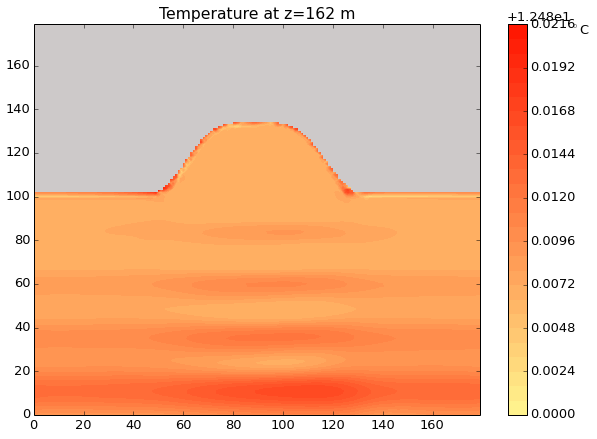

In [11]:
plt.rcParams.update({'font.size':13})

temp=getField(filename, 'Temp')
xc=getField(filename2, 'XC')
yc=getField(filename2, 'YC')

temp0 = np.ma.masked_values(temp, 0)

MASK = np.ma.getmask(temp0)

colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)

Tmin = np.min(temp[:,zlev,:,:])
Tmax = np.max(temp[:,zlev,:,:])     

posTemp = [0, 1] 

NumLev = 30 


fig1=plt.figure(figsize=(10,7))

ax=plt.gca()

ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))



plt.contourf(xc,yc,temp0[time,zlev,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))

cb = plt.colorbar()

cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)

plt.title("Temperature at z=%d m" % -z[zlev])


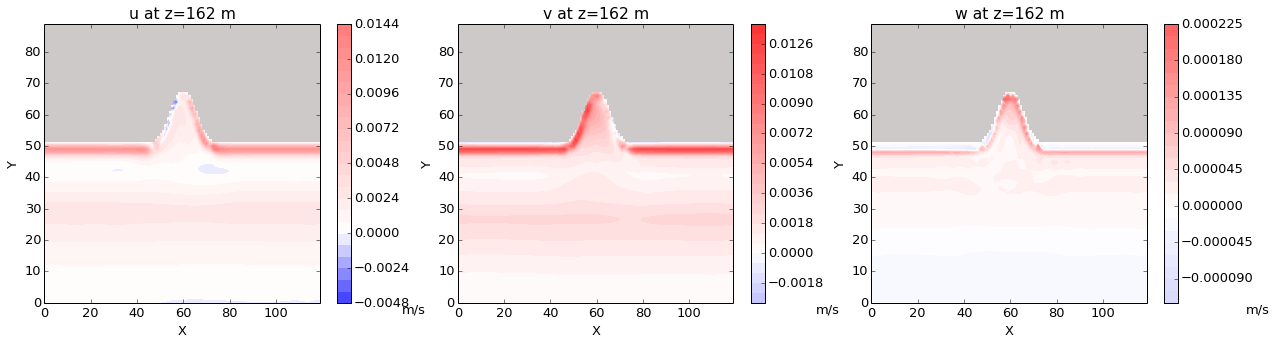

In [10]:
umask=np.ma.array(u,mask=MASK)
vmask=np.ma.array(v,mask=MASK)
wmask=np.ma.array(w,mask=MASK)

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

umin = np.min(umask[:,zlev,:,:])
umax = np.max(umask[:,zlev,:,:])     

pos = [0, abs(umin)/(abs(umin)+abs(umax)), 1] # to keep white color on zero

fig1=plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
ax=plt.gca()
ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

plt.contourf(umask[time,zlev,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= umin,vmax = umax)

cb = plt.colorbar()

cb.set_label('m/s',position=(0, 0),rotation=0)

plt.xlabel('X')

plt.ylabel('Y')
    
plt.title("u at z=%d m" % -z[zlev])



plt.subplot(1,3,2)
ax=plt.gca()
ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))


vmin = np.min(vmask[:,zlev,:,:])
vmax = np.max(vmask[:,zlev,:,:])     

pos = [0, abs(vmin)/(abs(vmin)+abs(vmax)), 1] # to keep white color on zero


plt.contourf(xc,yc,vmask[time,zlev,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= vmin,vmax = vmax)

plt.xlabel('X')

plt.ylabel('Y')
    
plt.title("v at z=%d m" % -z[zlev])

cb = plt.colorbar()  

cb.set_label('m/s',position=(0, 0),rotation=0)


plt.subplot(1,3,3)
ax=plt.gca()
ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

wmin = np.min(wmask[:,zlev,:,:])
wmax = np.max(wmask[:,zlev,:,:])     

pos = [0, abs(wmin)/(abs(wmin)+abs(wmax)), 1] # to keep white color on zero

plt.contourf(wmask[time,zlev,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= wmin,vmax = wmax)

plt.xlabel('X')

plt.ylabel('Y')
    
plt.title("w at z=%d m" % -z[zlev])

cb = plt.colorbar()

cb.set_label('m/s', position=(0, 0),rotation=0)

In [11]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

Uslice = umask[time,zlev,::arrow_step,::arrow_step]
Vslice = vmask[time,zlev,::arrow_step,::arrow_step]

print(np.shape(Uslice))
print(np.shape(Vslice))
print(np.shape(x_slice_a))
print(np.shape(y_slice_a))

spd = np.sqrt(umask**2 + vmask**2)

spdmin = np.min(spd[:,zlev,:,:])
spdmax = np.max(spd[:,zlev,:,:])     

pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero


plt.figure(figsize=(10,7))
ax=plt.gca()
ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

plt.contourf(spd[time,zlev,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)

cb = plt.colorbar()

cb.set_label('m/s', position=(0, 0),rotation=0)

plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')

plt.xlabel('X')

plt.ylabel('Y')
    
plt.title("Velocity at z=%d m" % -z[zlev])



(18, 24)
(18, 24)
(24,)
(18,)


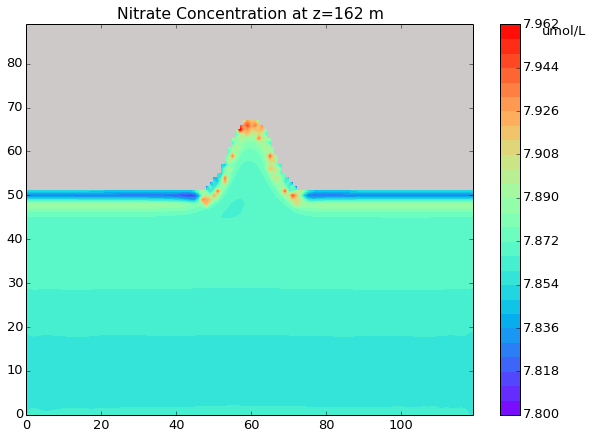

In [12]:
NO3=getField(filename3, 'NO3')

NO3mask=np.ma.array(NO3,mask=MASK)
plt.figure(figsize=(10,7))

ax=plt.gca()
ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

plt.contourf(xc,yc,NO3mask[time,zlev,:,:],30, cmap='rainbow')
cb = plt.colorbar()
cb.set_label('umol/L', position=(0, 1),rotation=0)
plt.title("Nitrate Concentration at z=%d m" % -z[zlev])

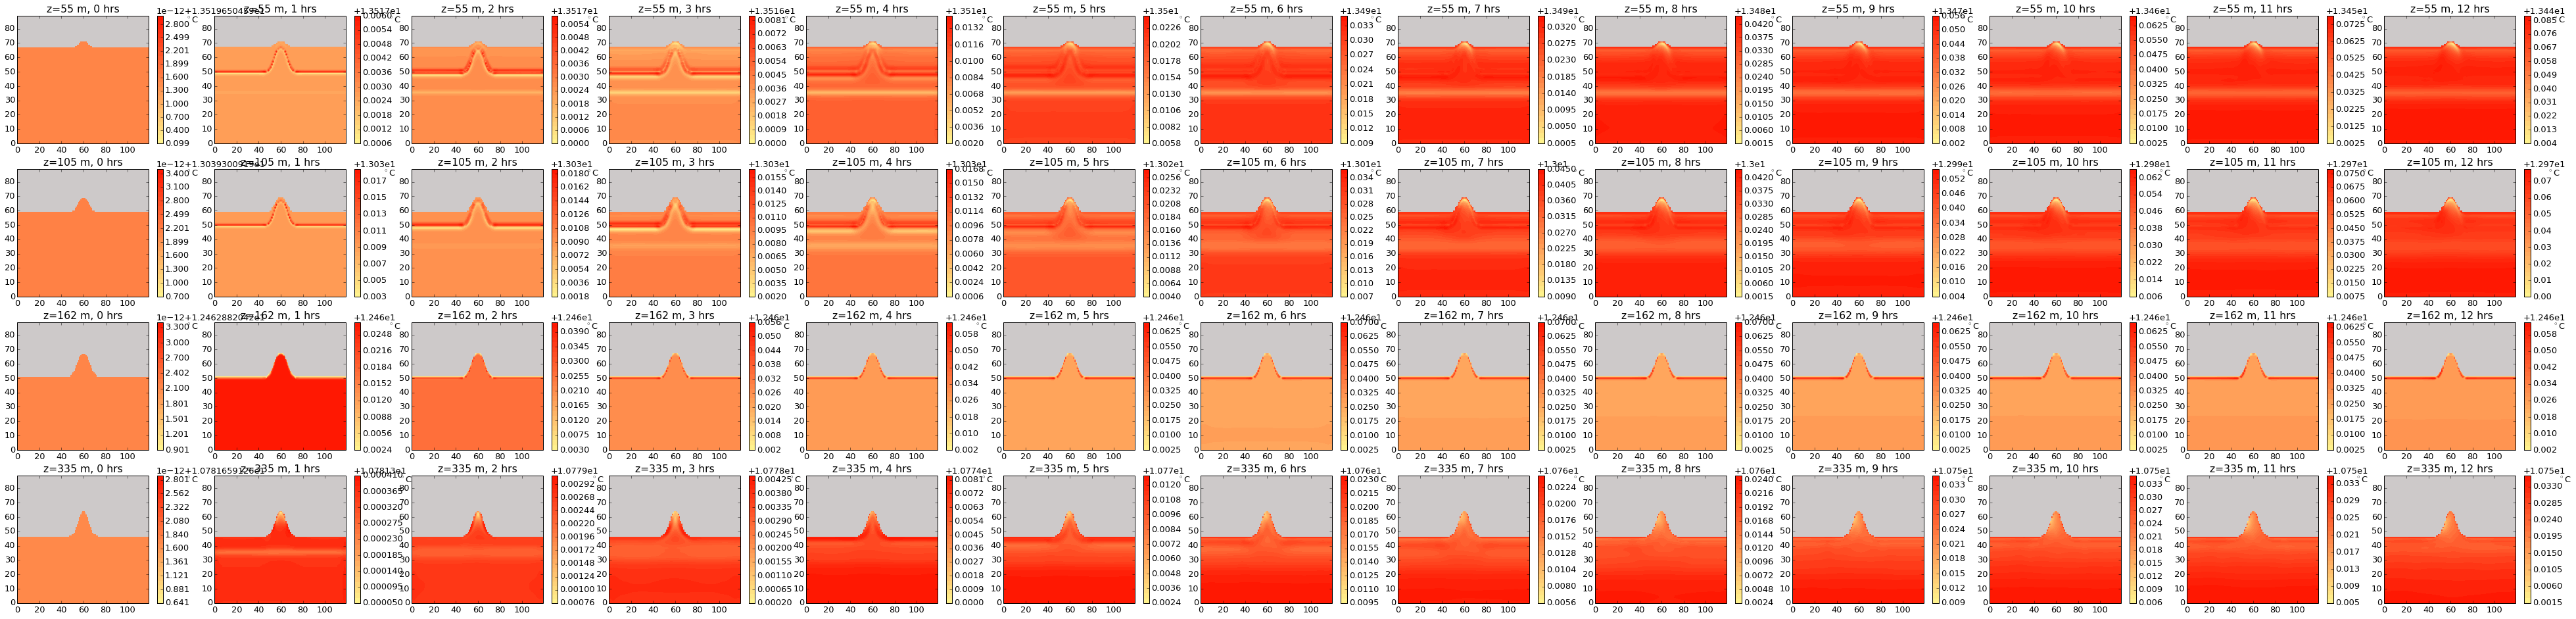

In [17]:

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [0,1,2,3,4,5,6,7,8,9,10,11,12]
kk=1

fig44=plt.figure(figsize=(69,16))

for ii in slices:
    for tt in tslices:
        
        temp=getField(filename, 'Temp')
        temp0 = np.ma.masked_values(temp, 0)
        
        MASK = np.ma.getmask(temp0)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        Tmin = np.min(temp[:,ii,:,:])
        Tmax = np.max(temp[:,ii,:,:])     
        
        posTemp = [0, 1] 
        
        NumLev = 30 
        
        
        
        plt.subplot(4,13,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(xc,yc,temp0[tt,ii,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)
        
        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1
        

In [18]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [13,14,15,16,17,18,19,20,21,22,23,24]
kk=1

fig44=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        
        temp=getField(filename, 'Temp')
        temp0 = np.ma.masked_values(temp, 0)
        
        MASK = np.ma.getmask(temp0)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        Tmin = np.min(temp[:,ii,:,:])
        Tmax = np.max(temp[:,ii,:,:])     
        
        posTemp = [0, 1] 
        
        NumLev = 30 
        
        
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(xc,yc,temp0[tt,ii,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)
        
        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

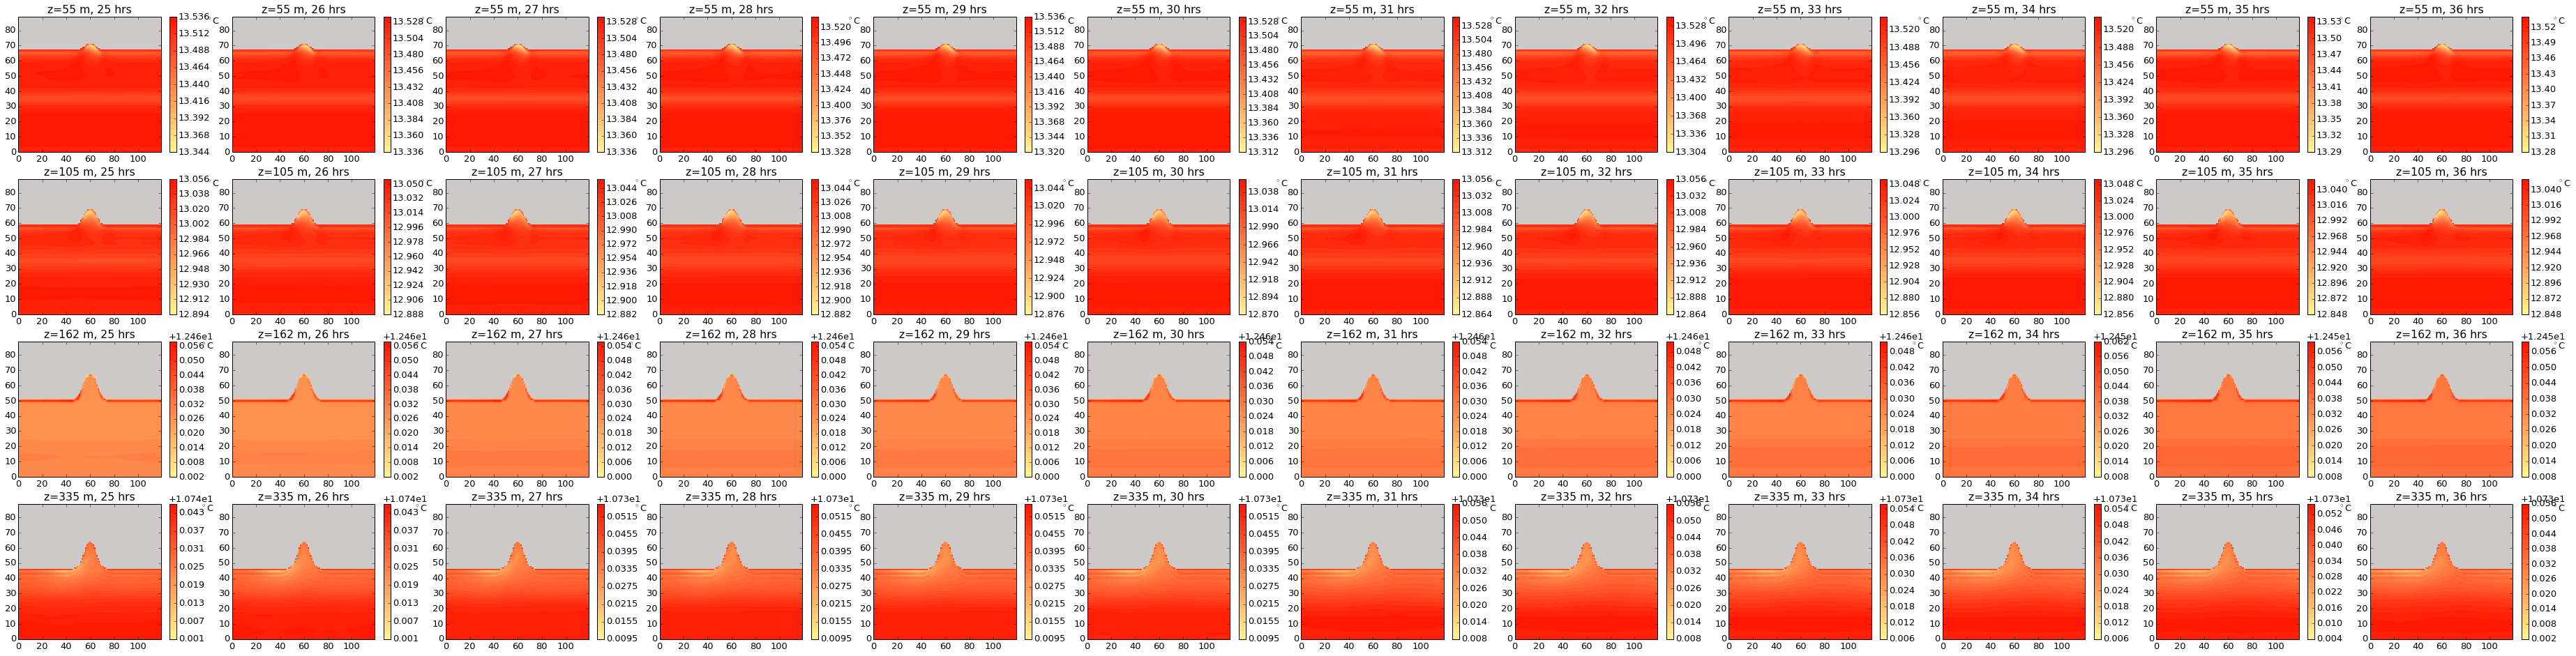

In [19]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [25,26,27,28,29,30,31,32,33,34,35,36]
kk=1

fig44=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        
        temp=getField(filename, 'Temp')
        temp0 = np.ma.masked_values(temp, 0)
        
        MASK = np.ma.getmask(temp0)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        Tmin = np.min(temp[:,ii,:,:])
        Tmax = np.max(temp[:,ii,:,:])     
        
        posTemp = [0, 1] 
        
        NumLev = 30 
        
        
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(temp0[tt,ii,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)
        
        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

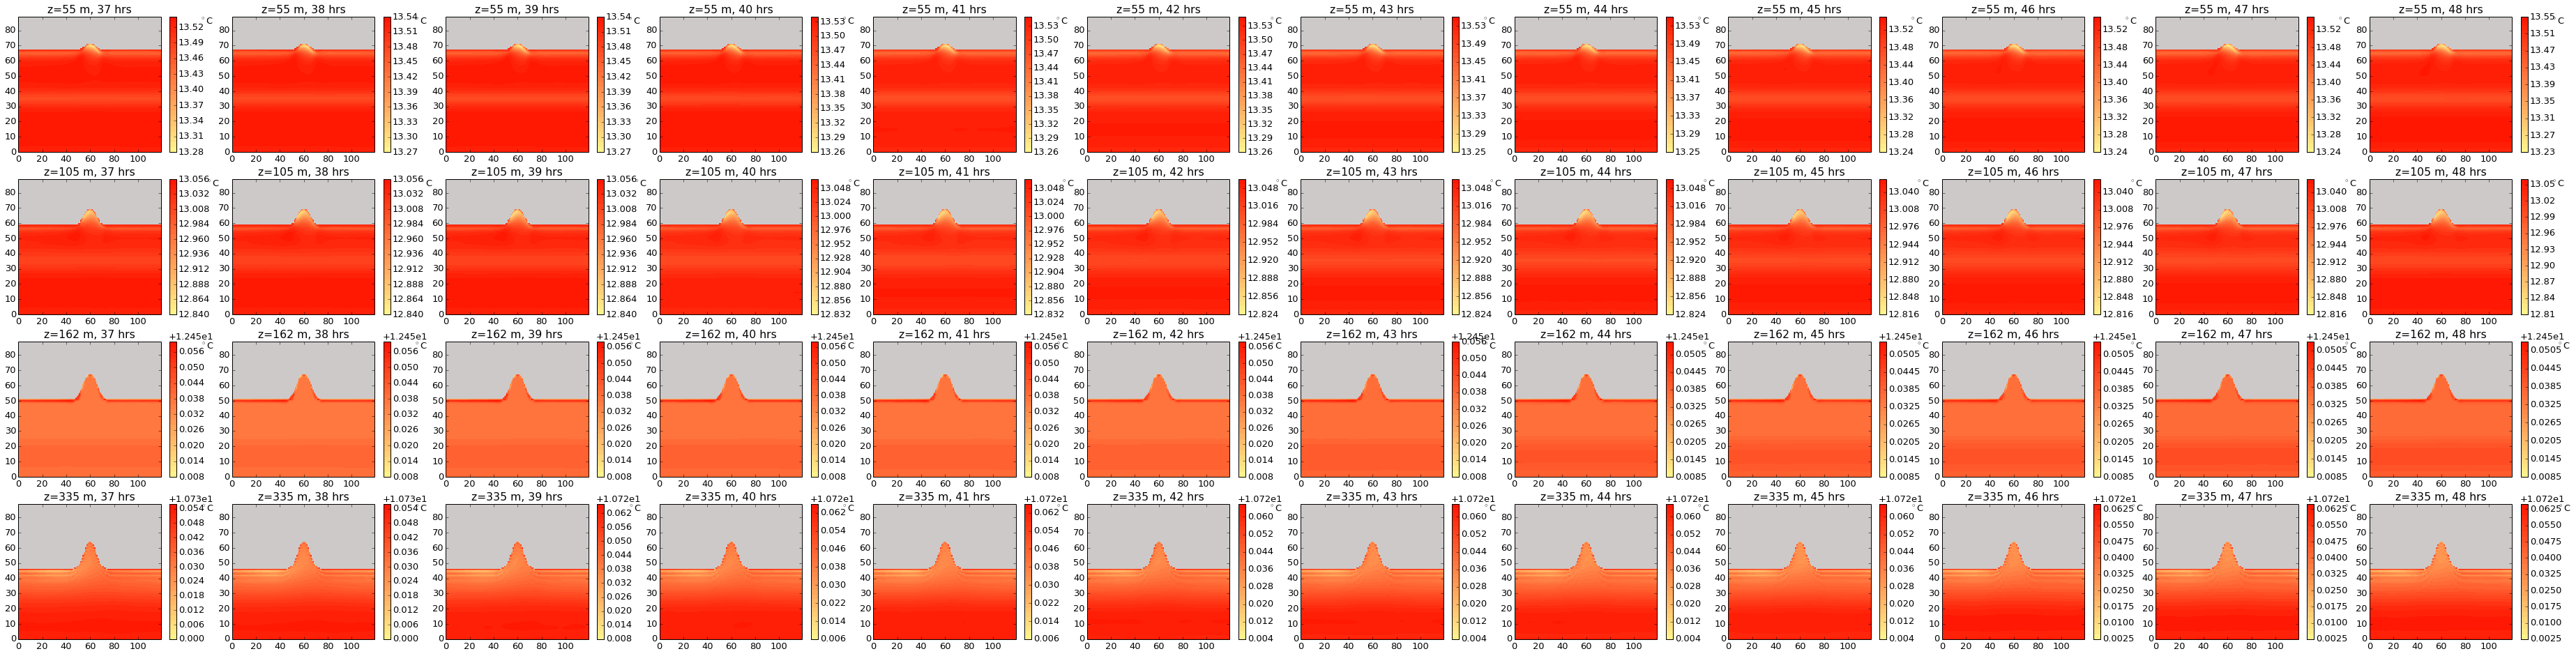

In [20]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [37,38,39,40,41,42,43,44,45,46,47,48]
kk=1

fig44=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        
        temp=getField(filename, 'Temp')
        temp0 = np.ma.masked_values(temp, 0)
        
        MASK = np.ma.getmask(temp0)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        Tmin = np.min(temp[:,ii,:,:])
        Tmax = np.max(temp[:,ii,:,:])     
        
        posTemp = [0, 1] 
        
        NumLev = 30 
        
        
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(temp0[tt,ii,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)
        
        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

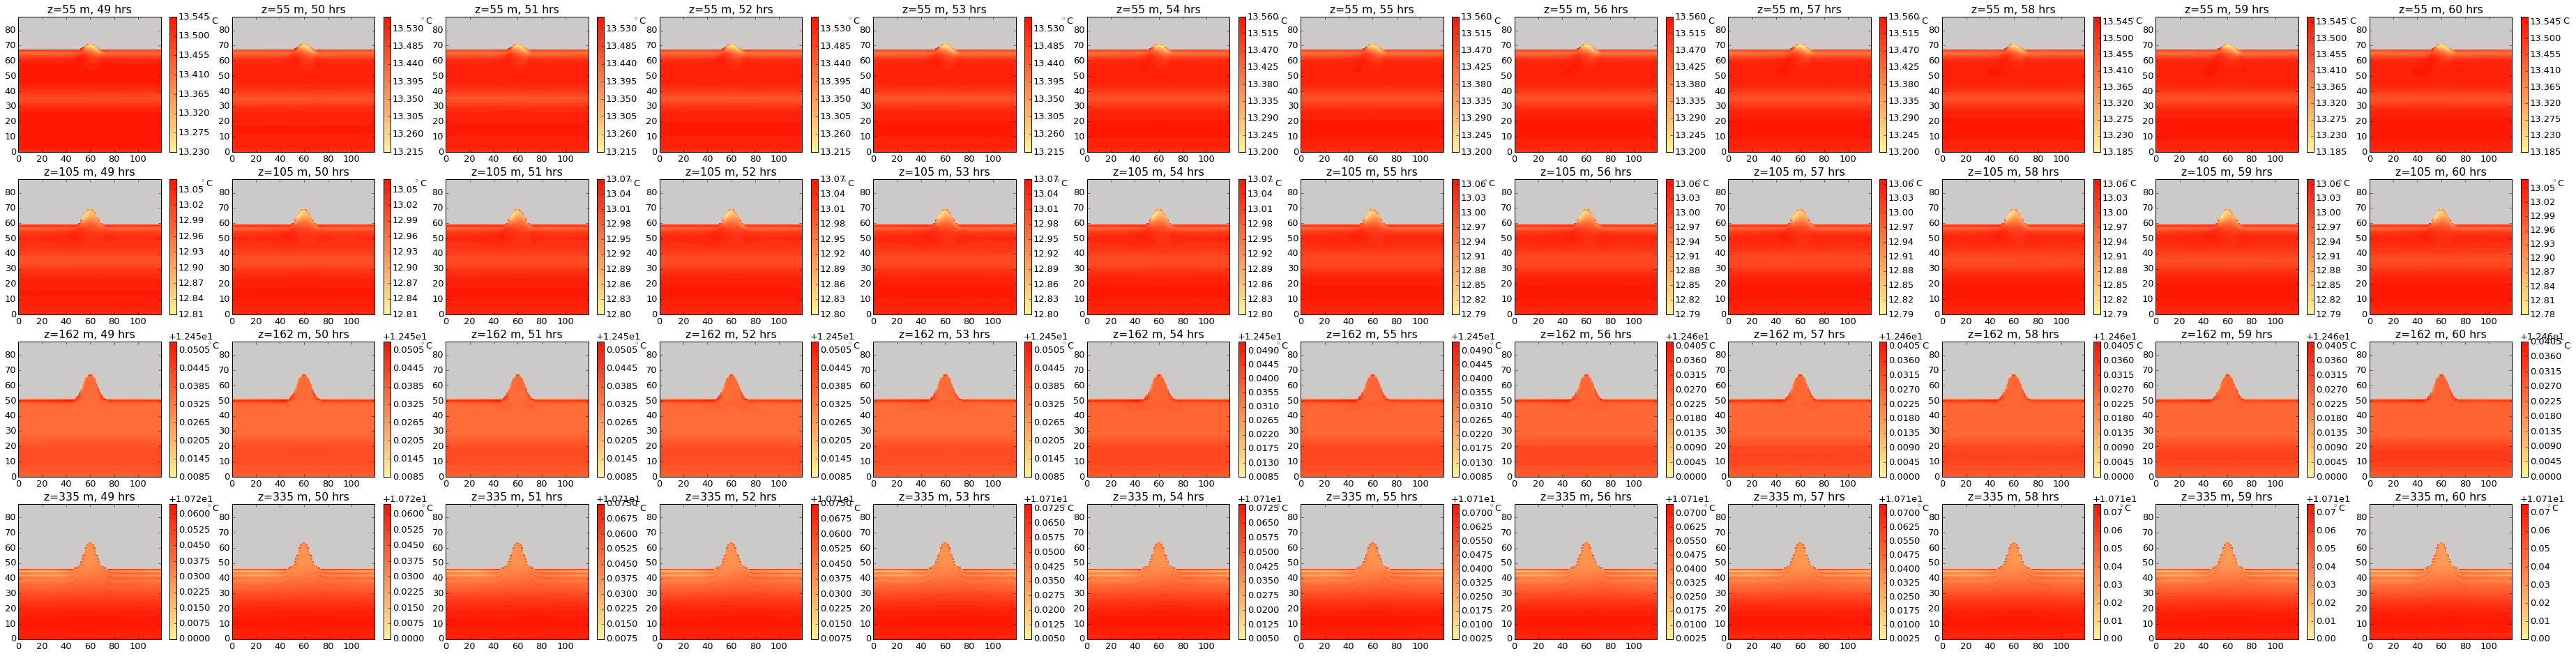

In [21]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [49,50,51,52,53,54,55,56,57,58,59,60]
kk=1

fig44=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        
        temp=getField(filename, 'Temp')
        temp0 = np.ma.masked_values(temp, 0)
        
        MASK = np.ma.getmask(temp0)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        Tmin = np.min(temp[:,ii,:,:])
        Tmax = np.max(temp[:,ii,:,:])     
        
        posTemp = [0, 1] 
        
        NumLev = 30 
        
        
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(temp0[tt,ii,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)
        
        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

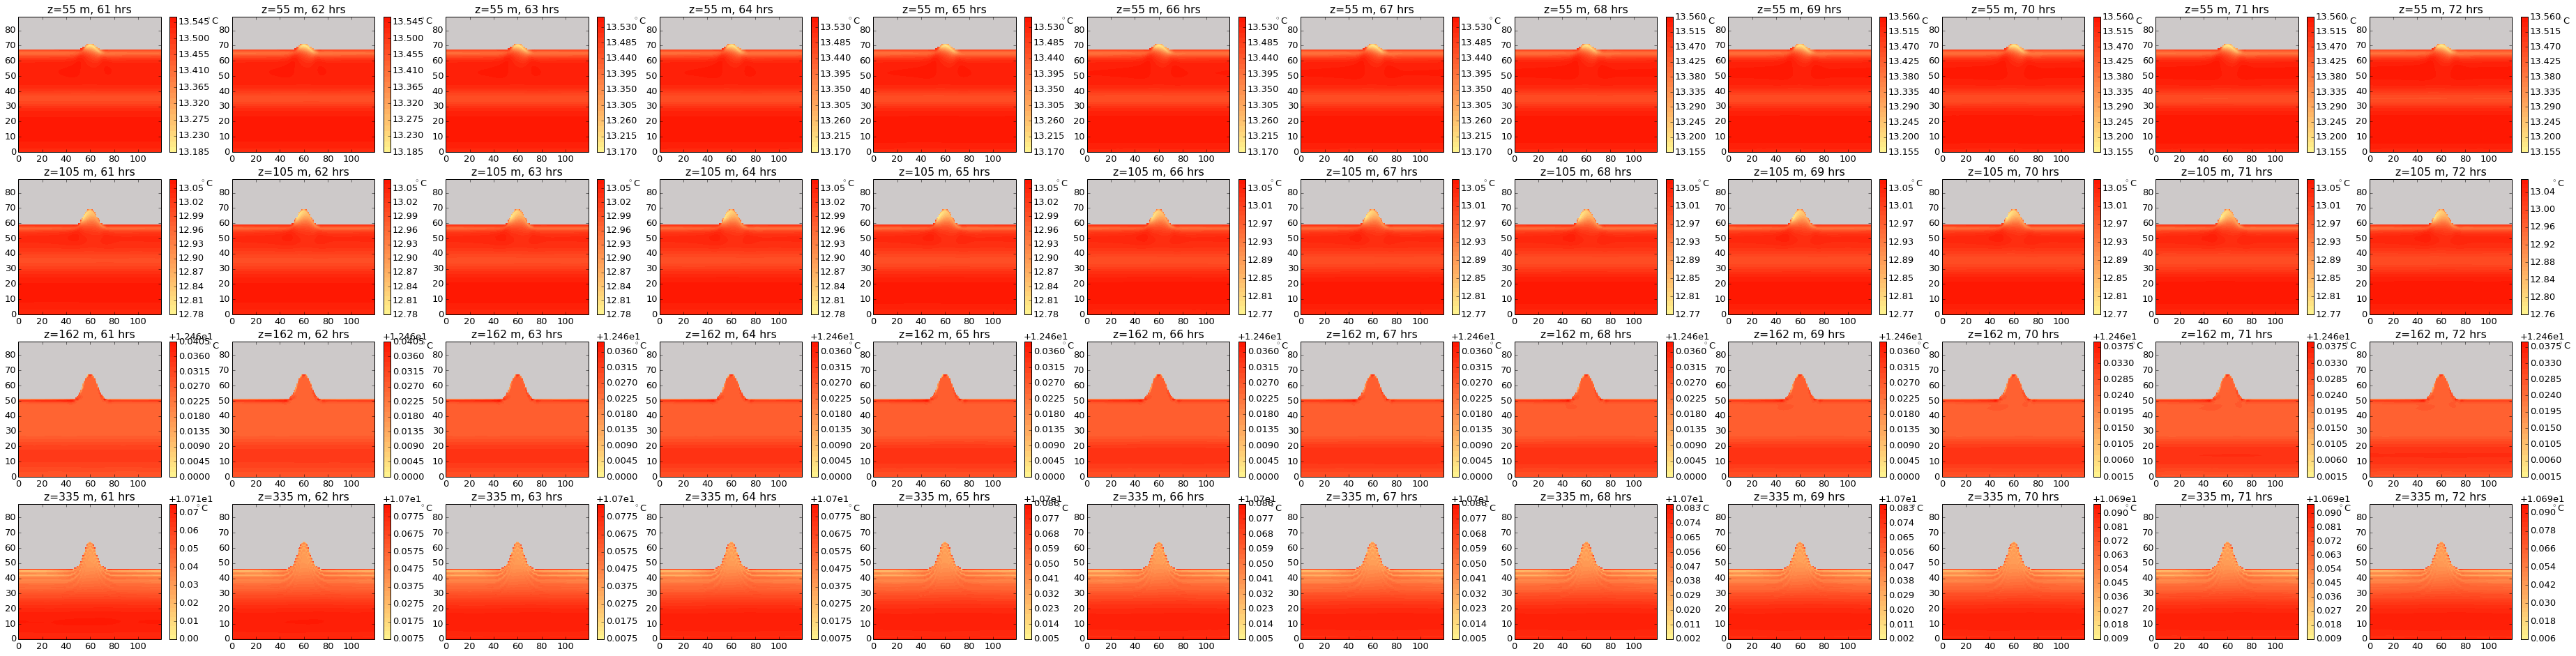

In [22]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [61,62,63,64,65,66,67,68,69,70,71,72]
kk=1

fig44=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        
        temp=getField(filename, 'Temp')
        temp0 = np.ma.masked_values(temp, 0)
        
        MASK = np.ma.getmask(temp0)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        Tmin = np.min(temp[:,ii,:,:])
        Tmax = np.max(temp[:,ii,:,:])     
        
        posTemp = [0, 1] 
        
        NumLev = 30 
        
        
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(temp0[tt,ii,:,:],NumLev,cmap=make_cmap(colorsTemp, position=posTemp))
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(0, 1),rotation=0)
        
        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

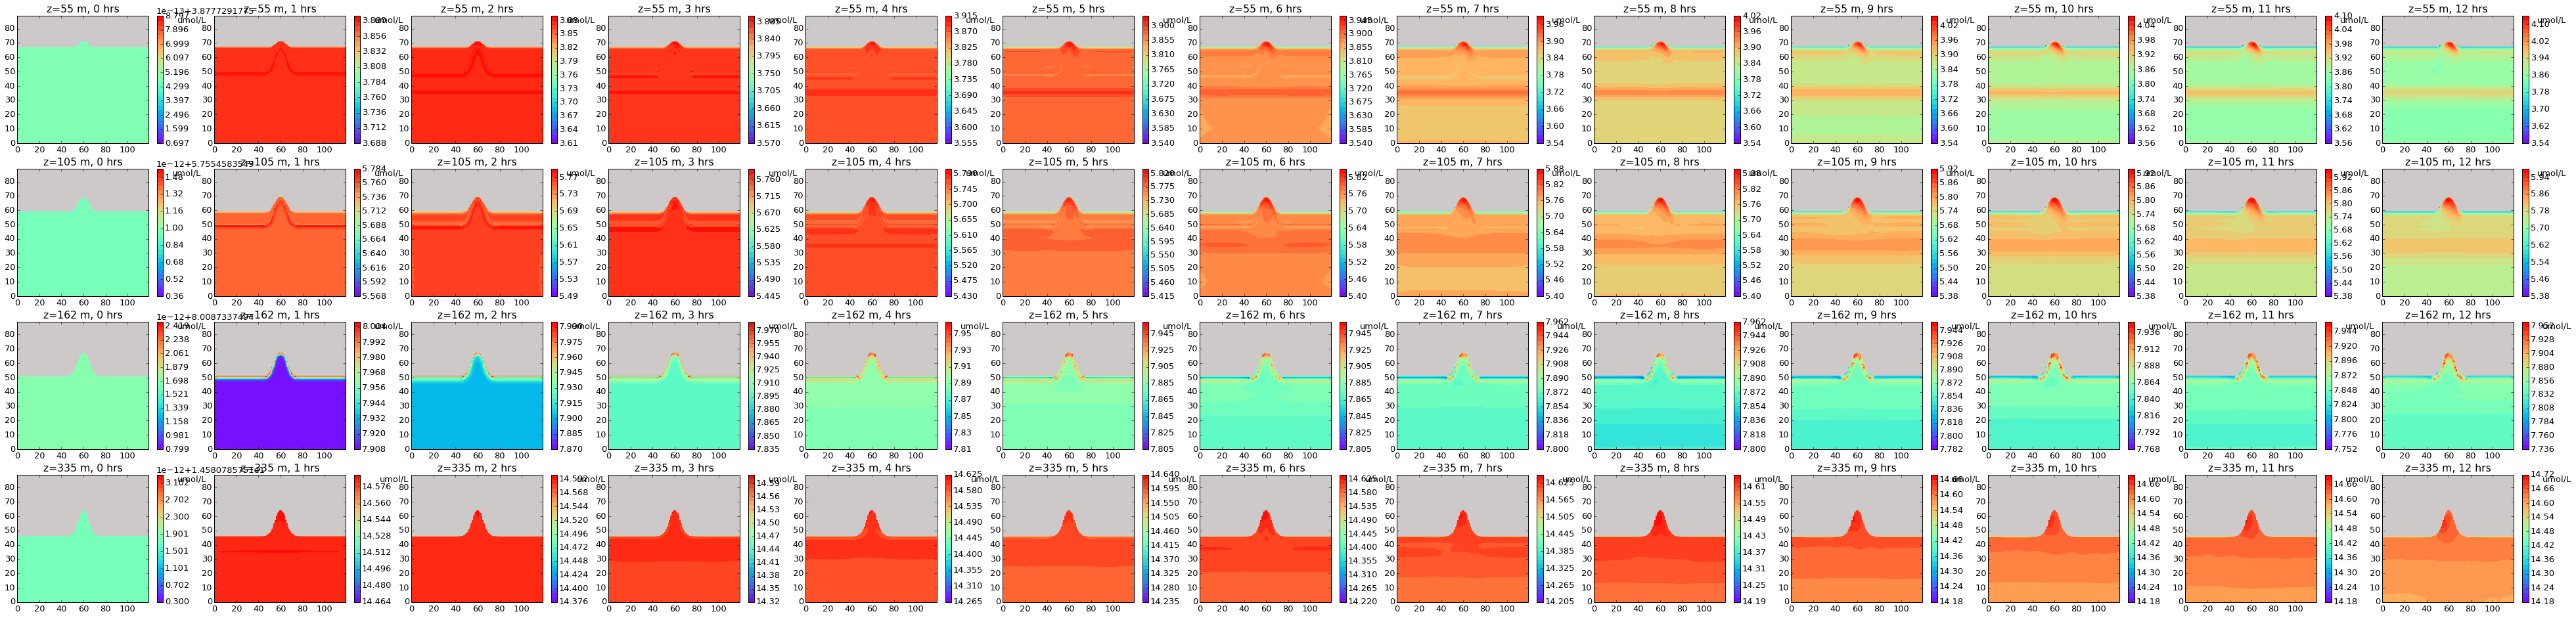

In [23]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [0,1,2,3,4,5,6,7,8,9,10,11,12]
kk=1

fig45=plt.figure(figsize=(69,16))

for ii in slices:
    for tt in tslices:
        NO3=getField(filename3, 'NO3')

        NO3mask=np.ma.array(NO3,mask=MASK)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        plt.subplot(4,13,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(NO3mask[tt,ii,:,:],30, cmap='rainbow')
        cb = plt.colorbar()
        cb.set_label('umol/L', position=(0, 1),rotation=0)

        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1
        

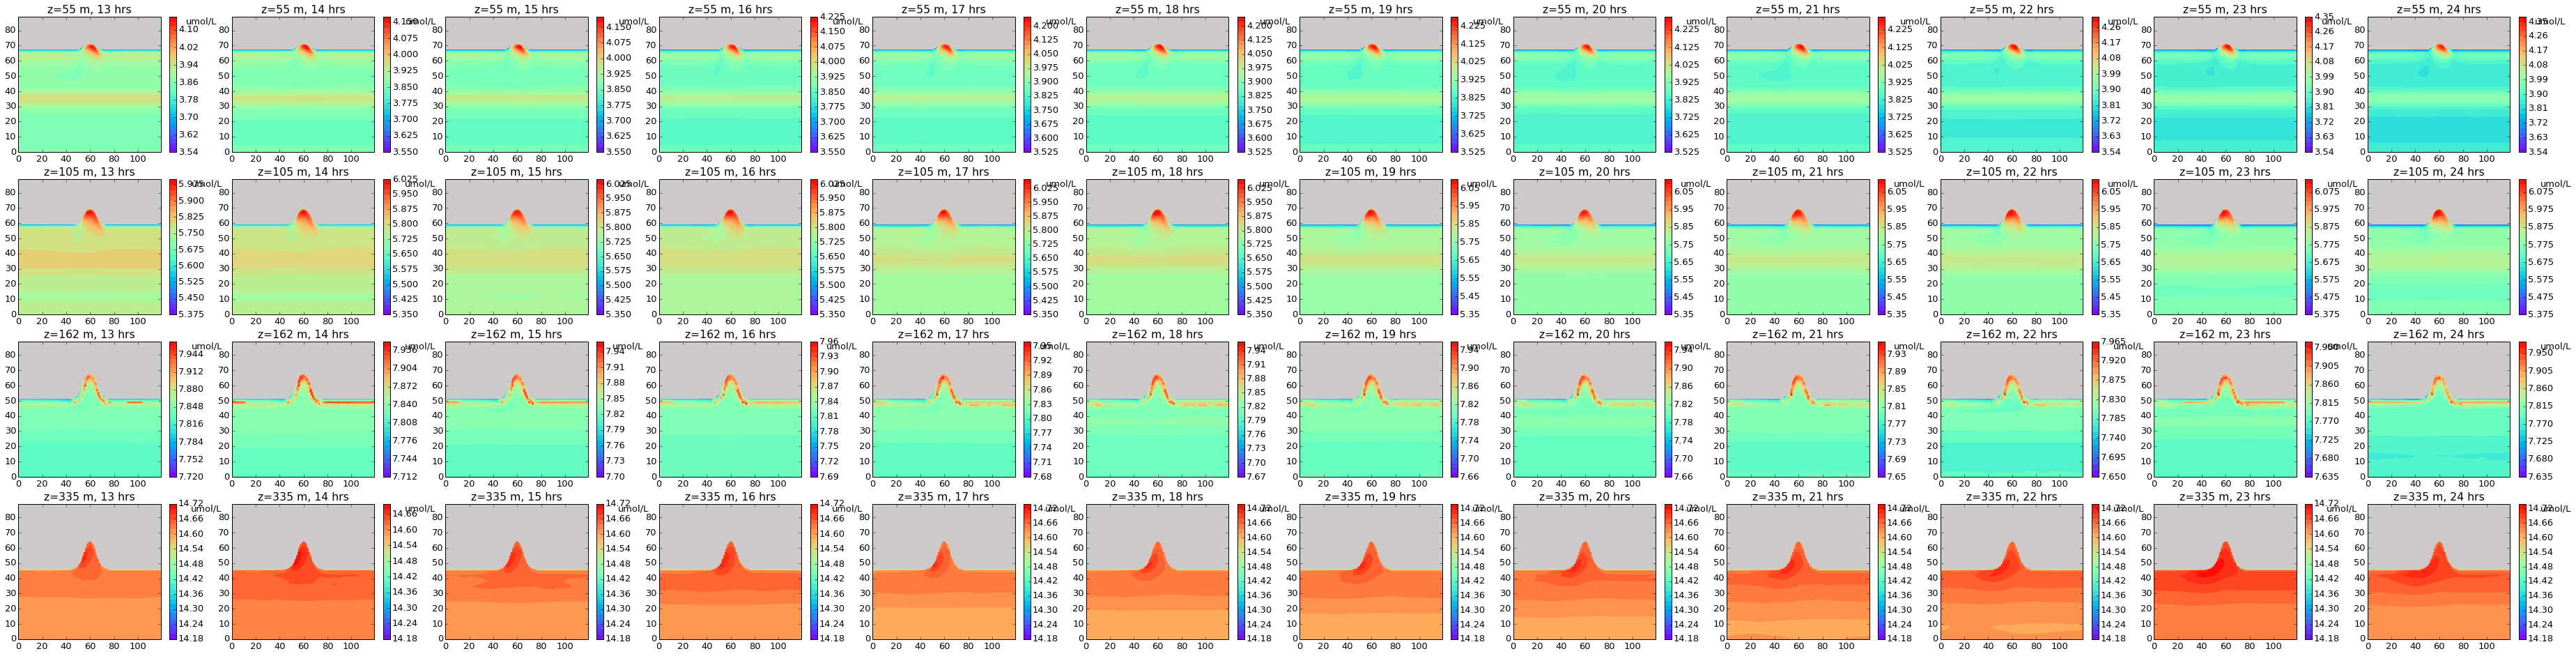

In [24]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [13,14,15,16,17,18,19,20,21,22,23,24]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        NO3=getField(filename3, 'NO3')

        NO3mask=np.ma.array(NO3,mask=MASK)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(NO3mask[tt,ii,:,:],30, cmap='rainbow')
        cb = plt.colorbar()
        cb.set_label('umol/L', position=(0, 1),rotation=0)

        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1
        

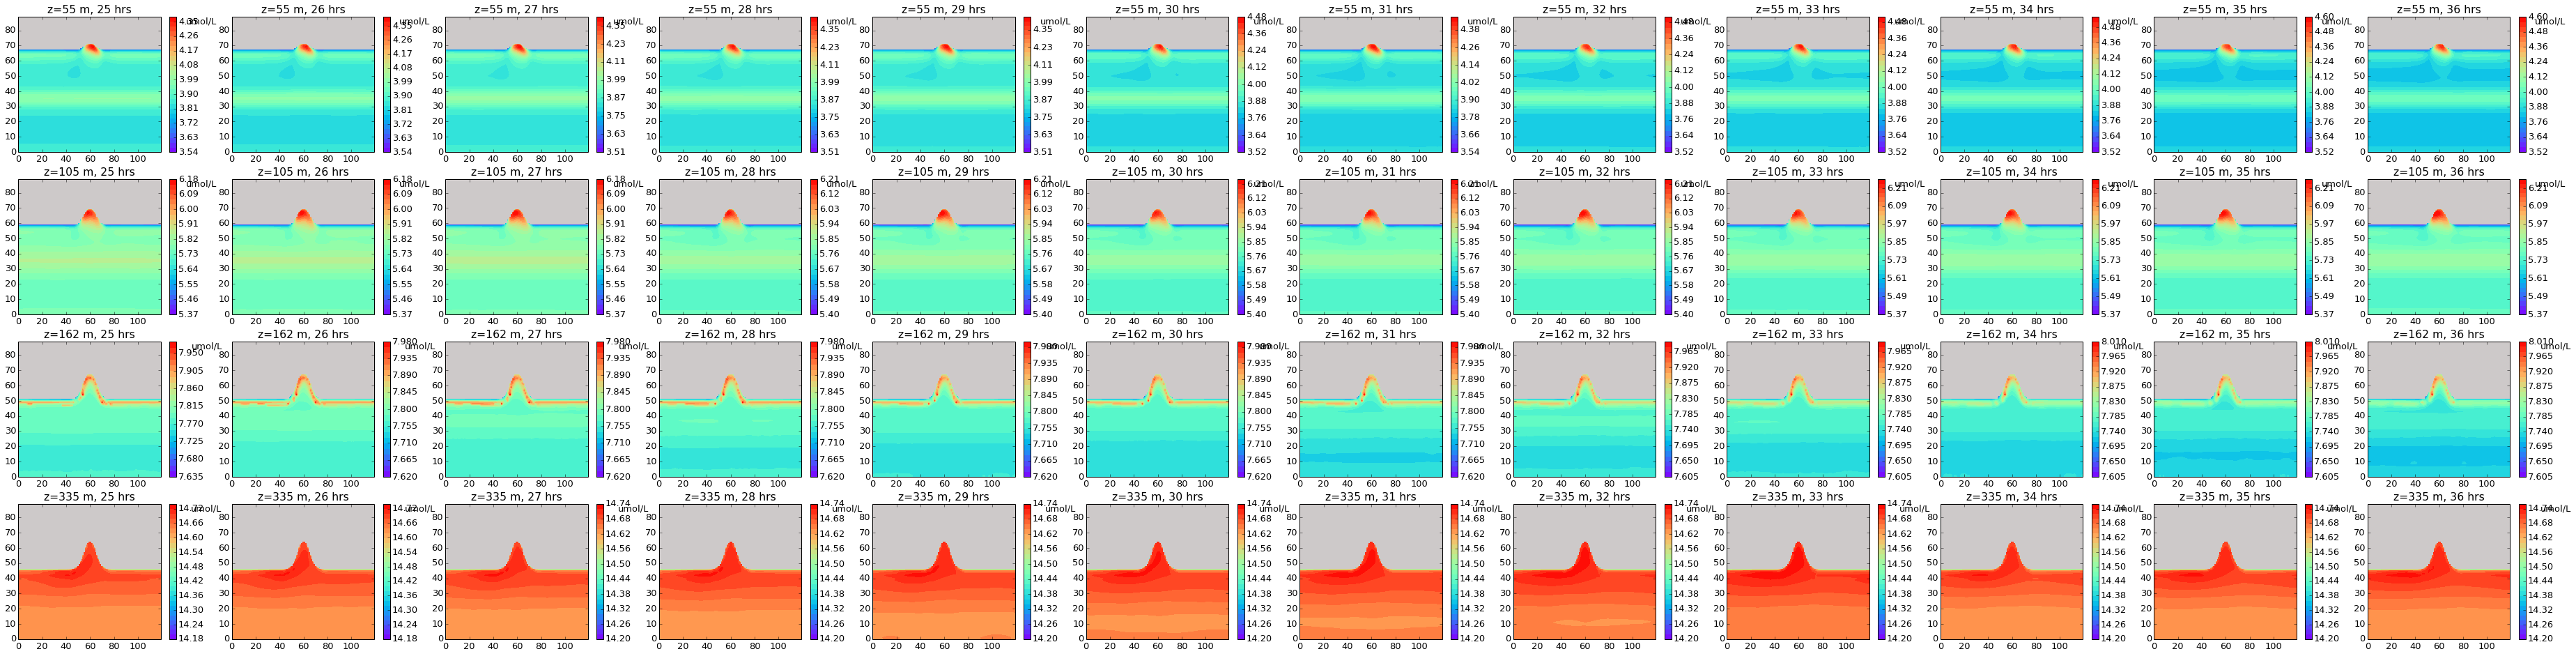

In [26]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [25,26,27,28,29,30,31,32,33,34,35,36]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        NO3=getField(filename3, 'NO3')

        NO3mask=np.ma.array(NO3,mask=MASK)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(NO3mask[tt,ii,:,:],30, cmap='rainbow')
        cb = plt.colorbar()
        cb.set_label('umol/L', position=(0, 1),rotation=0)

        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

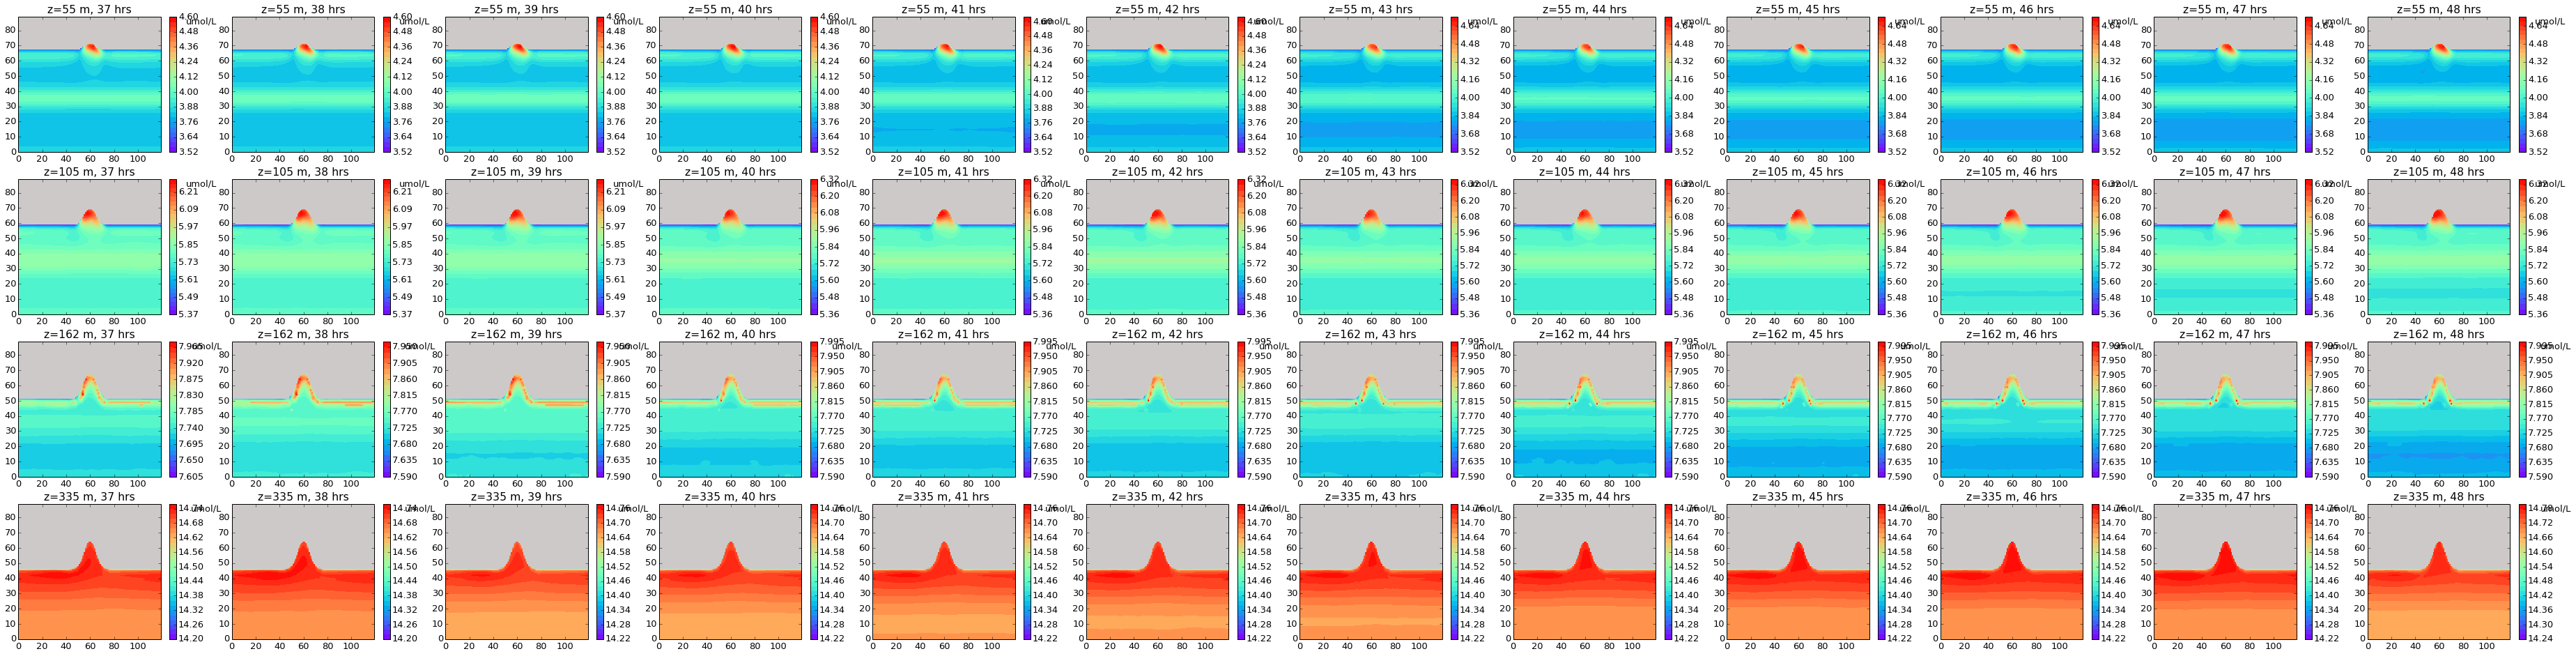

In [27]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [37,38,39,40,41,42,43,44,45,46,47,48]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        NO3=getField(filename3, 'NO3')

        NO3mask=np.ma.array(NO3,mask=MASK)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(NO3mask[tt,ii,:,:],30, cmap='rainbow')
        cb = plt.colorbar()
        cb.set_label('umol/L', position=(0, 1),rotation=0)

        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

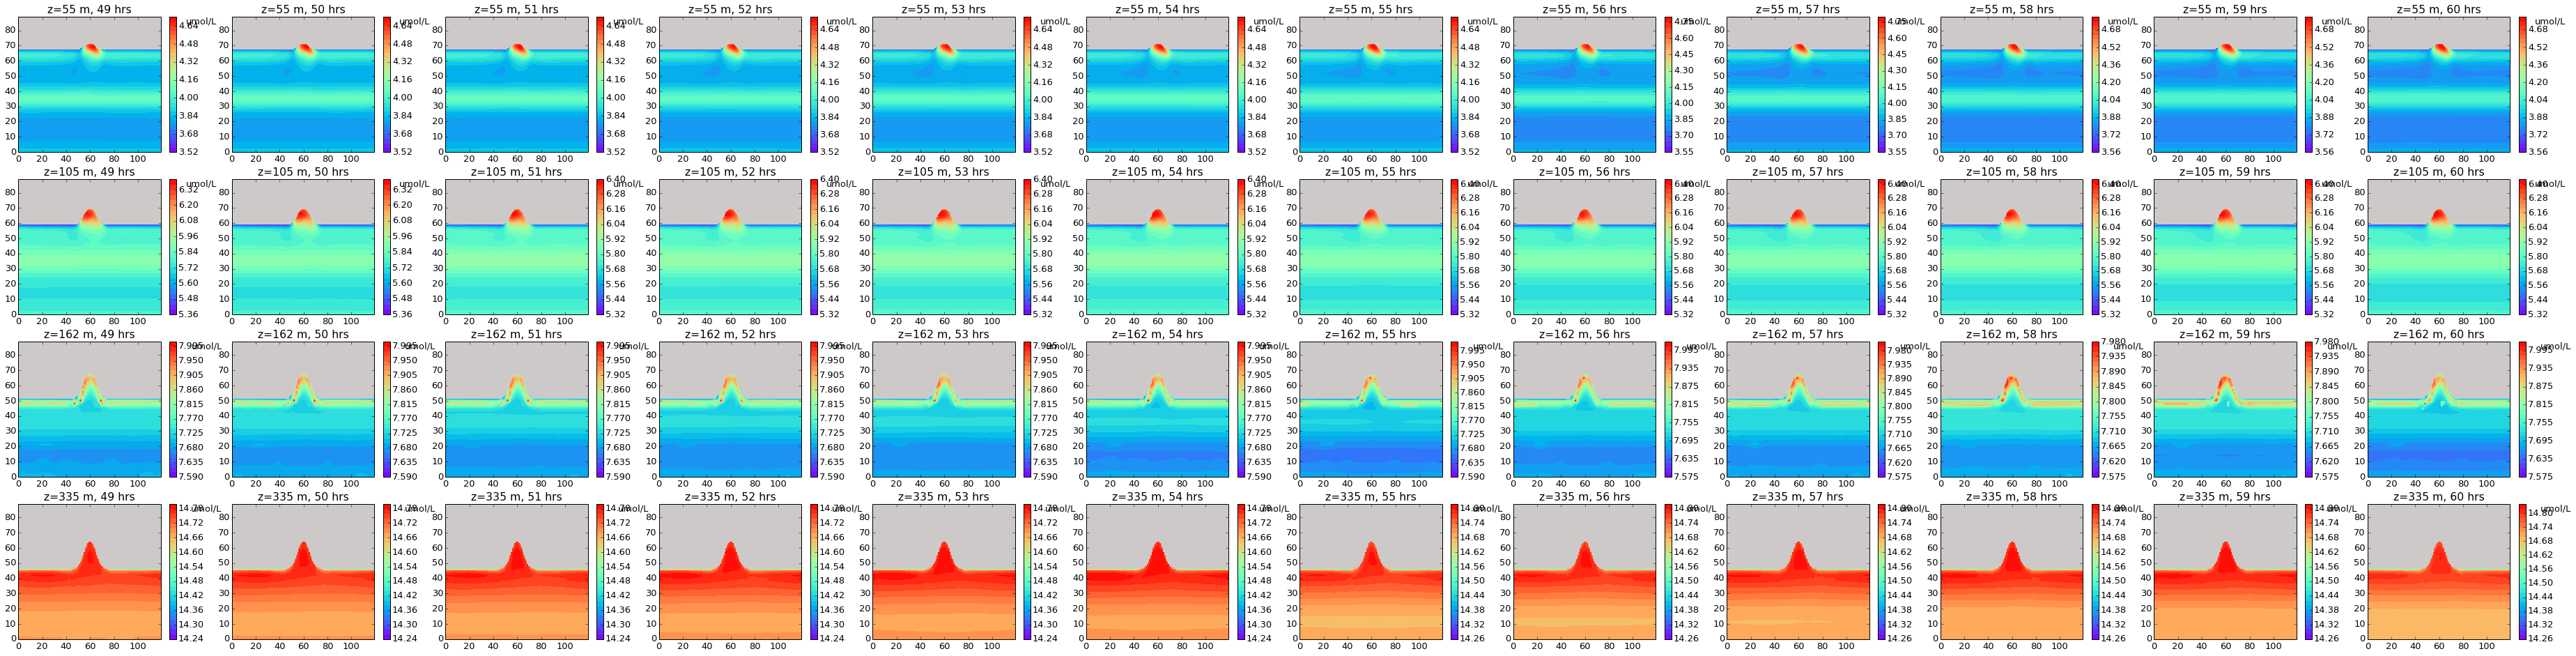

In [28]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [49,50,51,52,53,54,55,56,57,58,59,60]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        NO3=getField(filename3, 'NO3')

        NO3mask=np.ma.array(NO3,mask=MASK)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(NO3mask[tt,ii,:,:],30, cmap='rainbow')
        cb = plt.colorbar()
        cb.set_label('umol/L', position=(0, 1),rotation=0)

        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

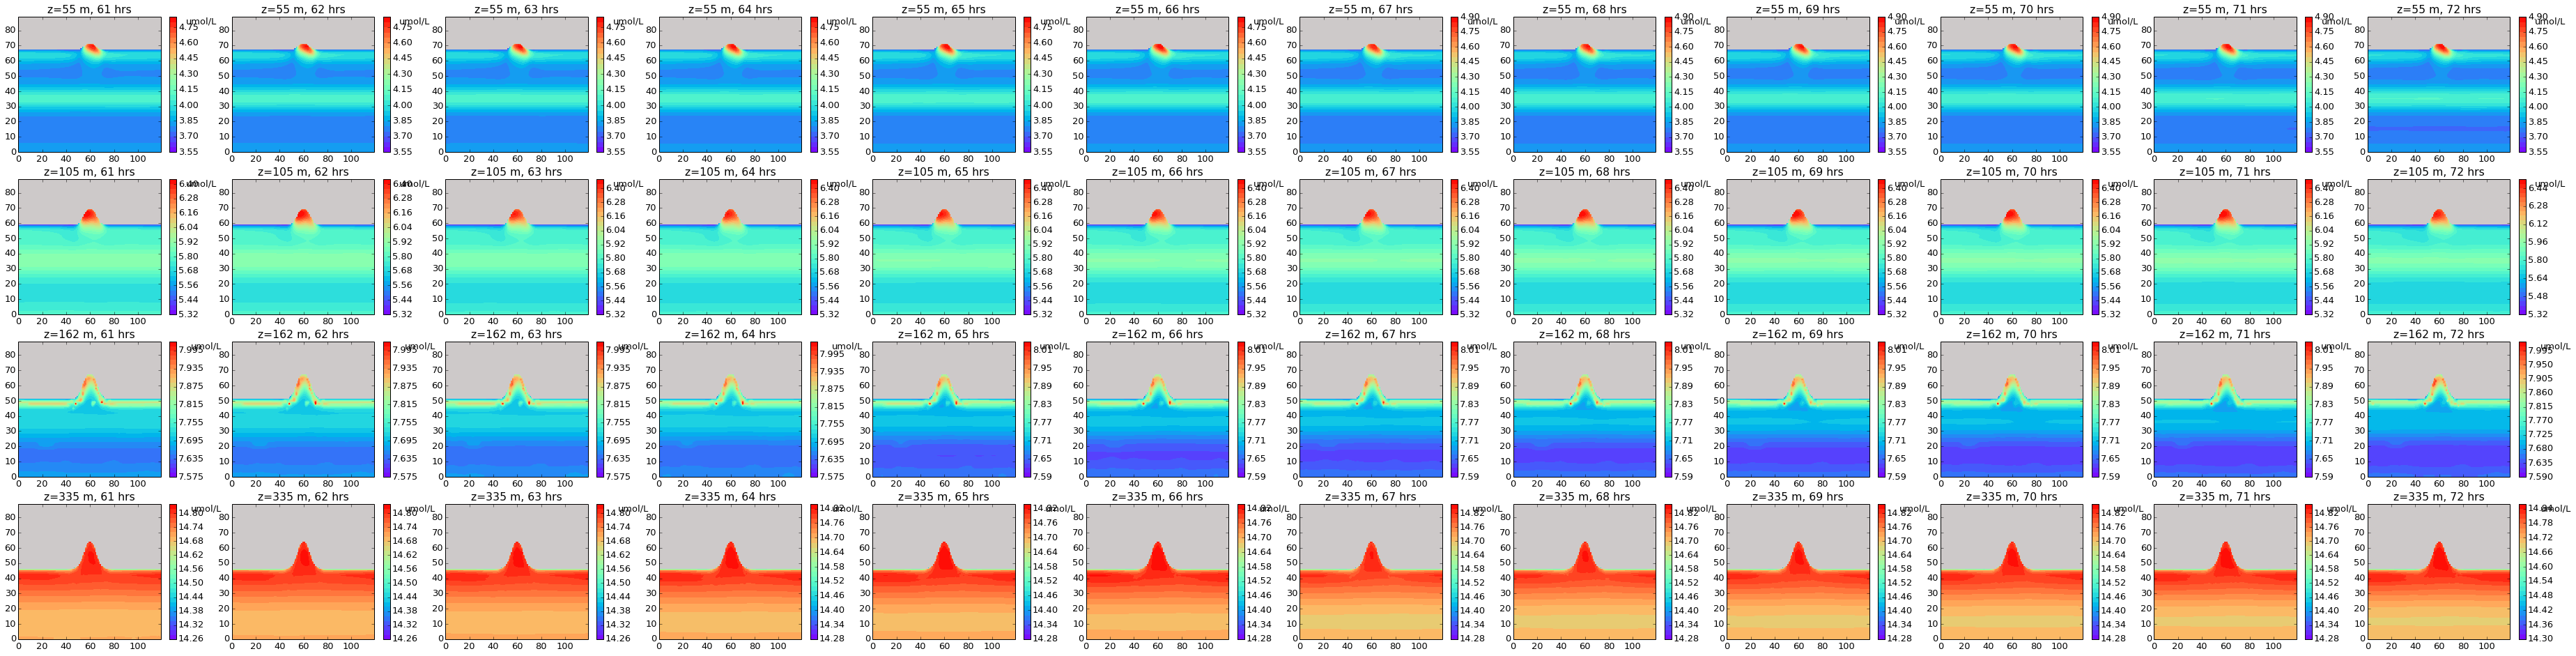

In [29]:
plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [61,62,63,64,65,66,67,68,69,70,71,72]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
        NO3=getField(filename3, 'NO3')

        NO3mask=np.ma.array(NO3,mask=MASK)
        
        colorsTemp = [(1,246/255.0,143./255.0), (255/255.0,20/255.0,0)] #(khaki1 ,orangered2)
        
        plt.subplot(4,12,kk)
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))

        plt.contourf(NO3mask[tt,ii,:,:],30, cmap='rainbow')
        cb = plt.colorbar()
        cb.set_label('umol/L', position=(0, 1),rotation=0)

        plt.title("z=%d m, %d hrs " % (-z[ii], tt))
        kk=kk+1

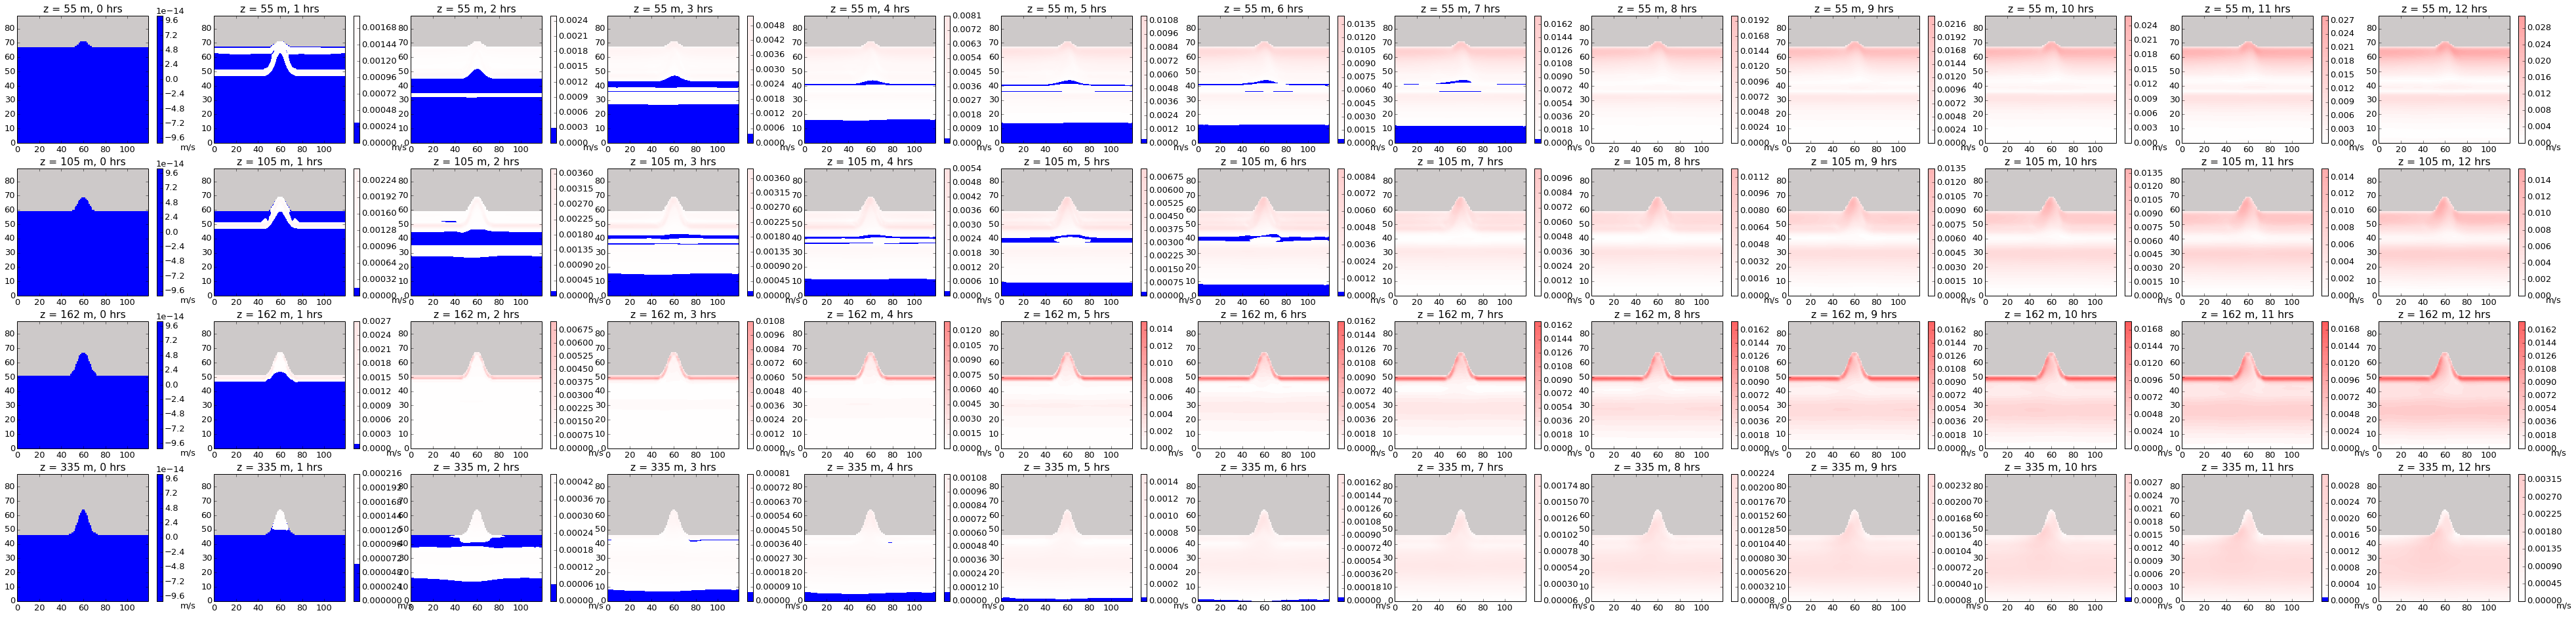

In [31]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [0,1,2,3,4,5,6,7,8,9,10,11,12]
kk=1

fig45=plt.figure(figsize=(69,16))

for ii in slices:
    for tt in tslices:
    
        #Uslice = umask[tt,ii,::arrow_step,::arrow_step]
        #Vslice = vmask[tt,ii,::arrow_step,::arrow_step]
        
        ##print(np.shape(Uslice))
        ##print(np.shape(Vslice))
        ##print(np.shape(x_slice_a))
        ##print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        spdmin = np.min(spd[:,ii,:,:])
        spdmax = np.max(spd[:,ii,:,:])     
        
        pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero
        
        plt.subplot(4,13,kk)
        
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        plt.contourf(spd[tt,ii,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(0, 0),rotation=0)
        
        ##plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')
        
        #plt.xlabel('X')
        
        #plt.ylabel('Y')
            
        plt.title("z = %d m, %d hrs" % (-z[ii],tt))
        kk=kk+1


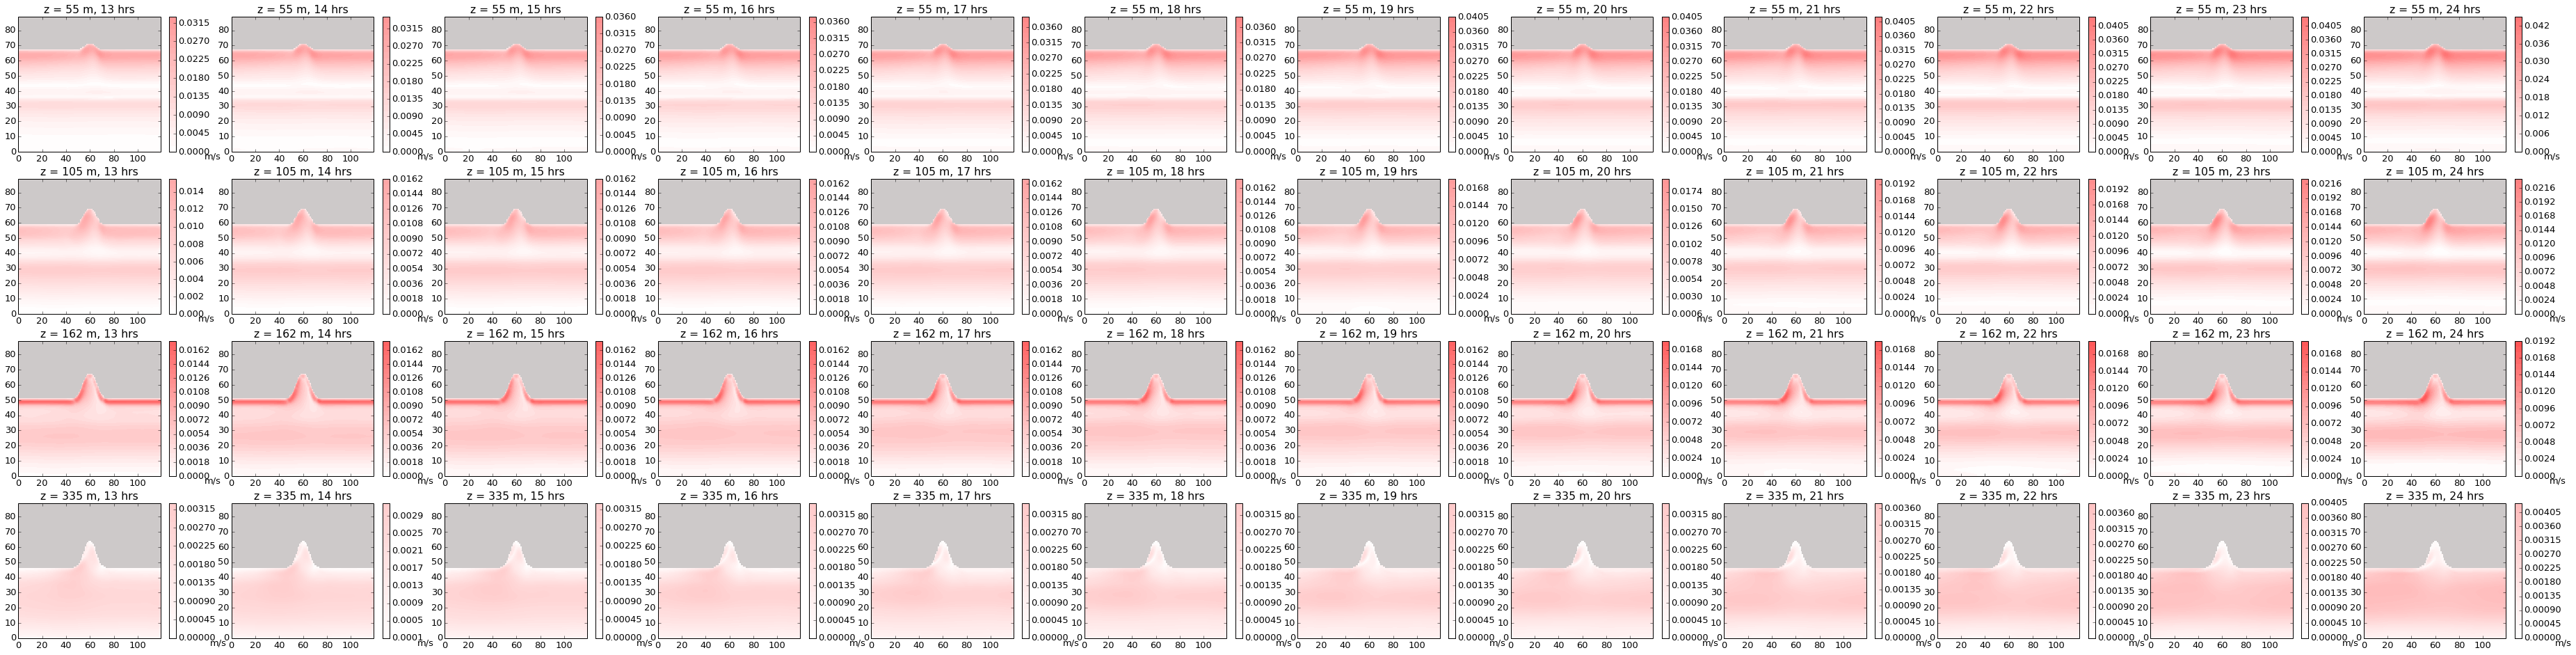

In [32]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [13,14,15,16,17,18,19,20,21,22,23,24]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
    
        #Uslice = umask[tt,ii,::arrow_step,::arrow_step]
        #Vslice = vmask[tt,ii,::arrow_step,::arrow_step]
        
        ##print(np.shape(Uslice))
        ##print(np.shape(Vslice))
        ##print(np.shape(x_slice_a))
        ##print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        spdmin = np.min(spd[:,ii,:,:])
        spdmax = np.max(spd[:,ii,:,:])     
        
        pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero
        
        plt.subplot(4,12,kk)
        
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        plt.contourf(spd[tt,ii,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(0, 0),rotation=0)
        
        ##plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')
        
        #plt.xlabel('X')
        
        #plt.ylabel('Y')
            
        plt.title("z = %d m, %d hrs" % (-z[ii],tt))
        kk=kk+1


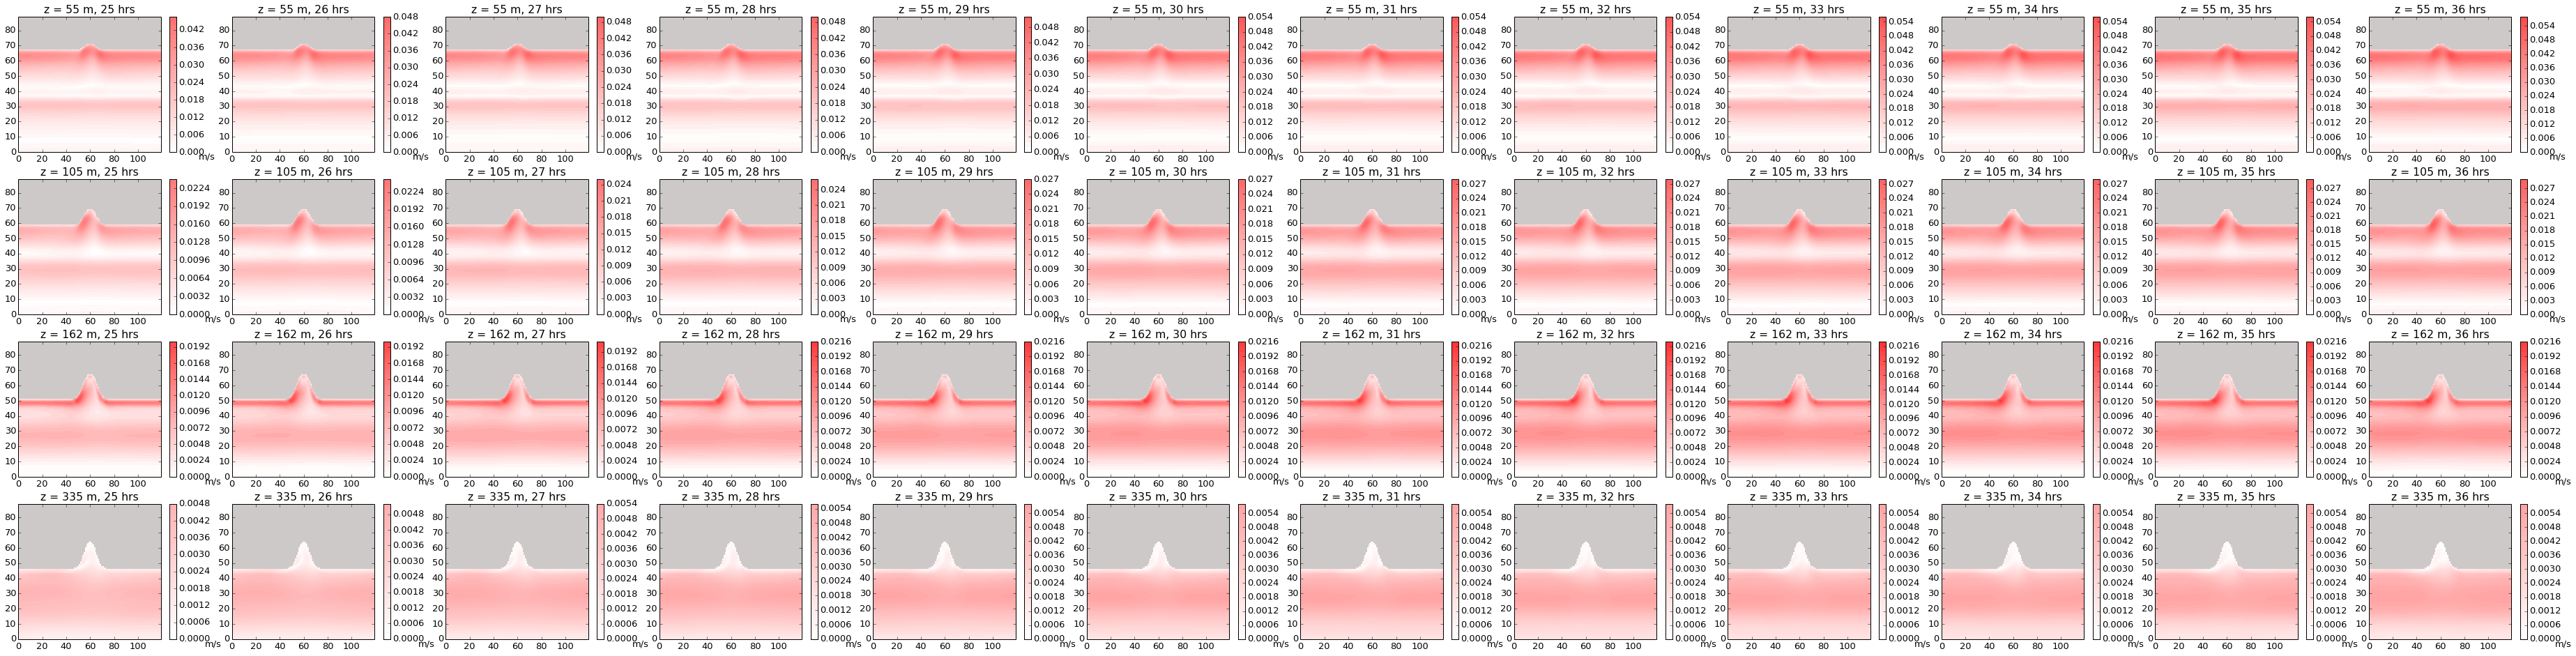

In [33]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [25,26,27,28,29,30,31,32,33,34,35,36]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
    
        #Uslice = umask[tt,ii,::arrow_step,::arrow_step]
        #Vslice = vmask[tt,ii,::arrow_step,::arrow_step]
        
        ##print(np.shape(Uslice))
        ##print(np.shape(Vslice))
        ##print(np.shape(x_slice_a))
        ##print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        spdmin = np.min(spd[:,ii,:,:])
        spdmax = np.max(spd[:,ii,:,:])     
        
        pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero
        
        plt.subplot(4,12,kk)
        
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        plt.contourf(spd[tt,ii,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(0, 0),rotation=0)
        
        ##plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')
        
        #plt.xlabel('X')
        
        #plt.ylabel('Y')
            
        plt.title("z = %d m, %d hrs" % (-z[ii],tt))
        kk=kk+1


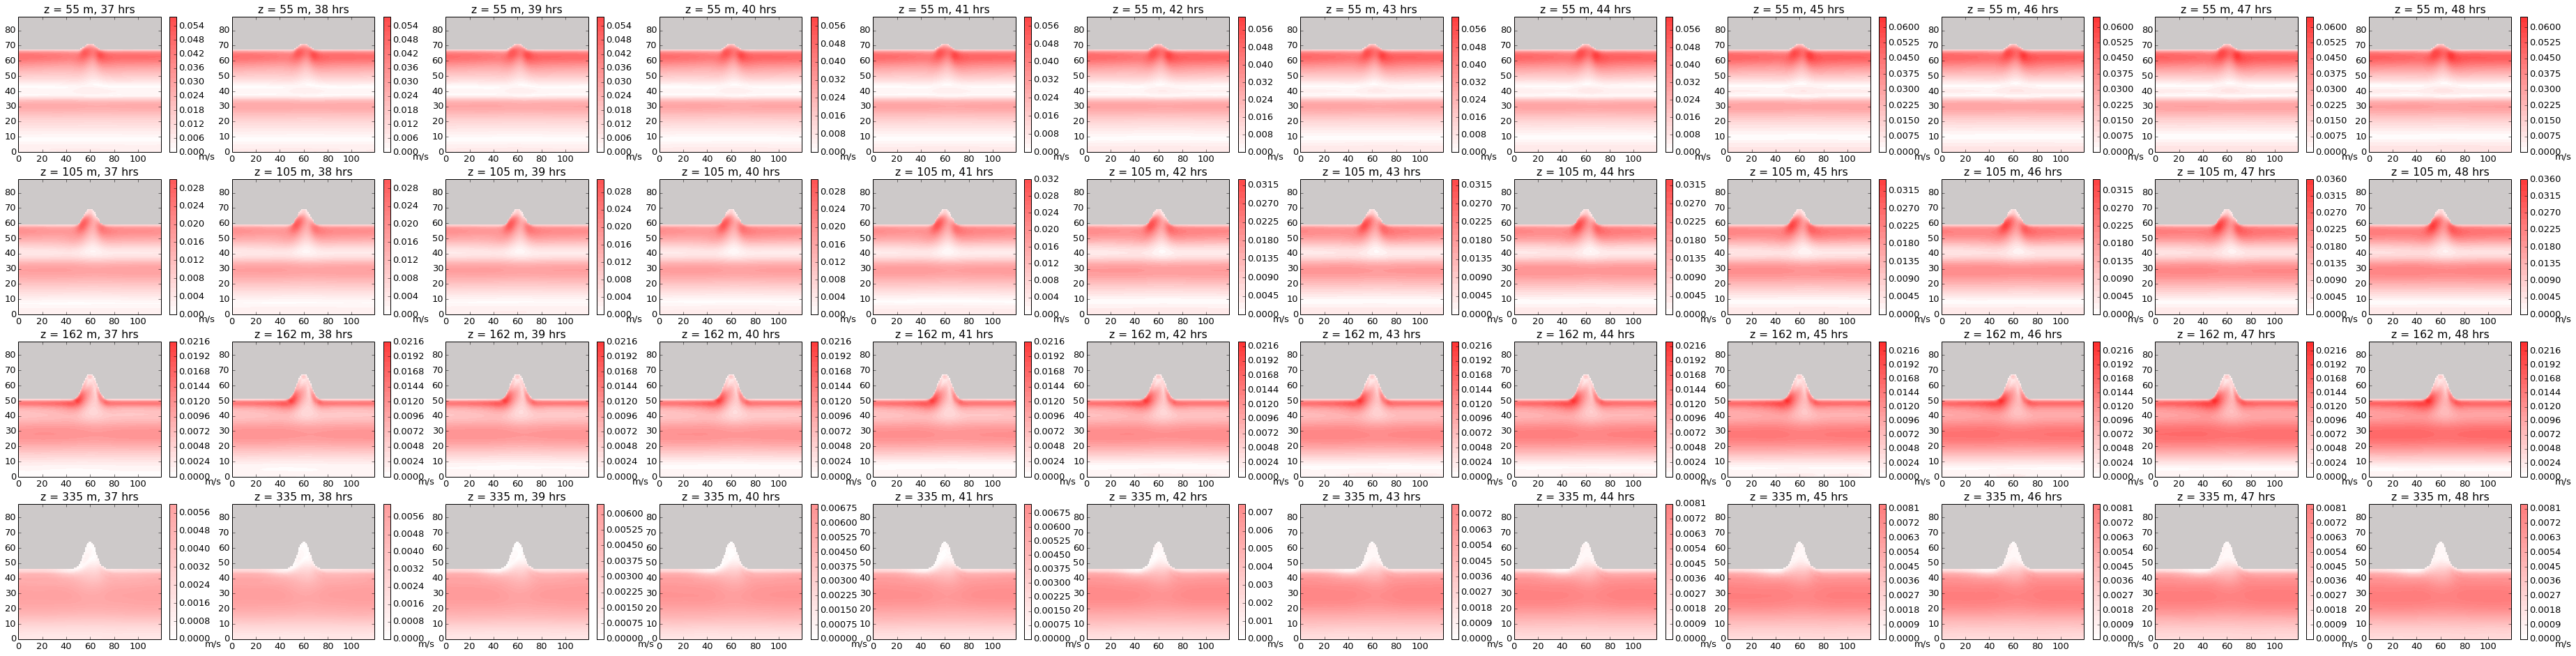

In [34]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [37,38,39,40,41,42,43,44,45,46,47,48]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
    
        #Uslice = umask[tt,ii,::arrow_step,::arrow_step]
        #Vslice = vmask[tt,ii,::arrow_step,::arrow_step]
        
        ##print(np.shape(Uslice))
        ##print(np.shape(Vslice))
        ##print(np.shape(x_slice_a))
        ##print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        spdmin = np.min(spd[:,ii,:,:])
        spdmax = np.max(spd[:,ii,:,:])     
        
        pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero
        
        plt.subplot(4,12,kk)
        
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        plt.contourf(spd[tt,ii,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(0, 0),rotation=0)
        
        ##plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')
        
        #plt.xlabel('X')
        
        #plt.ylabel('Y')
            
        plt.title("z = %d m, %d hrs" % (-z[ii],tt))
        kk=kk+1


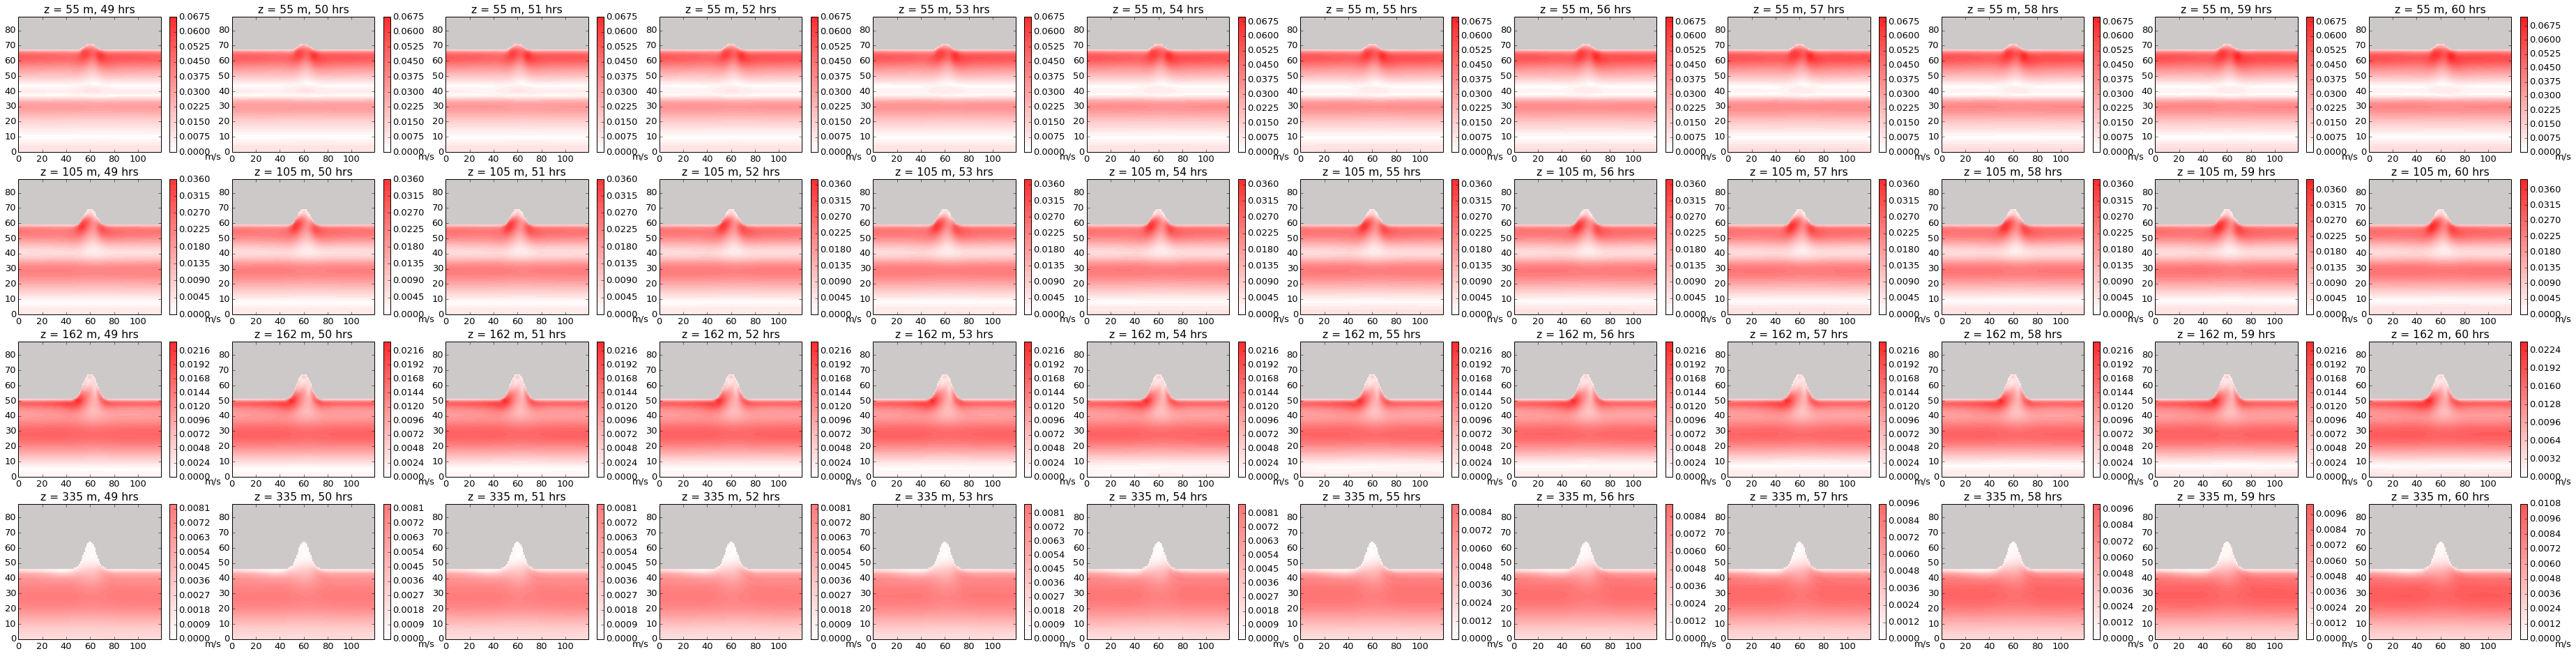

In [35]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [49,50,51,52,53,54,55,56,57,58,59,60]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
    
        #Uslice = umask[tt,ii,::arrow_step,::arrow_step]
        #Vslice = vmask[tt,ii,::arrow_step,::arrow_step]
        
        ##print(np.shape(Uslice))
        ##print(np.shape(Vslice))
        ##print(np.shape(x_slice_a))
        ##print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        spdmin = np.min(spd[:,ii,:,:])
        spdmax = np.max(spd[:,ii,:,:])     
        
        pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero
        
        plt.subplot(4,12,kk)
        
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        plt.contourf(spd[tt,ii,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(0, 0),rotation=0)
        
        ##plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')
        
        #plt.xlabel('X')
        
        #plt.ylabel('Y')
            
        plt.title("z = %d m, %d hrs" % (-z[ii],tt))
        kk=kk+1


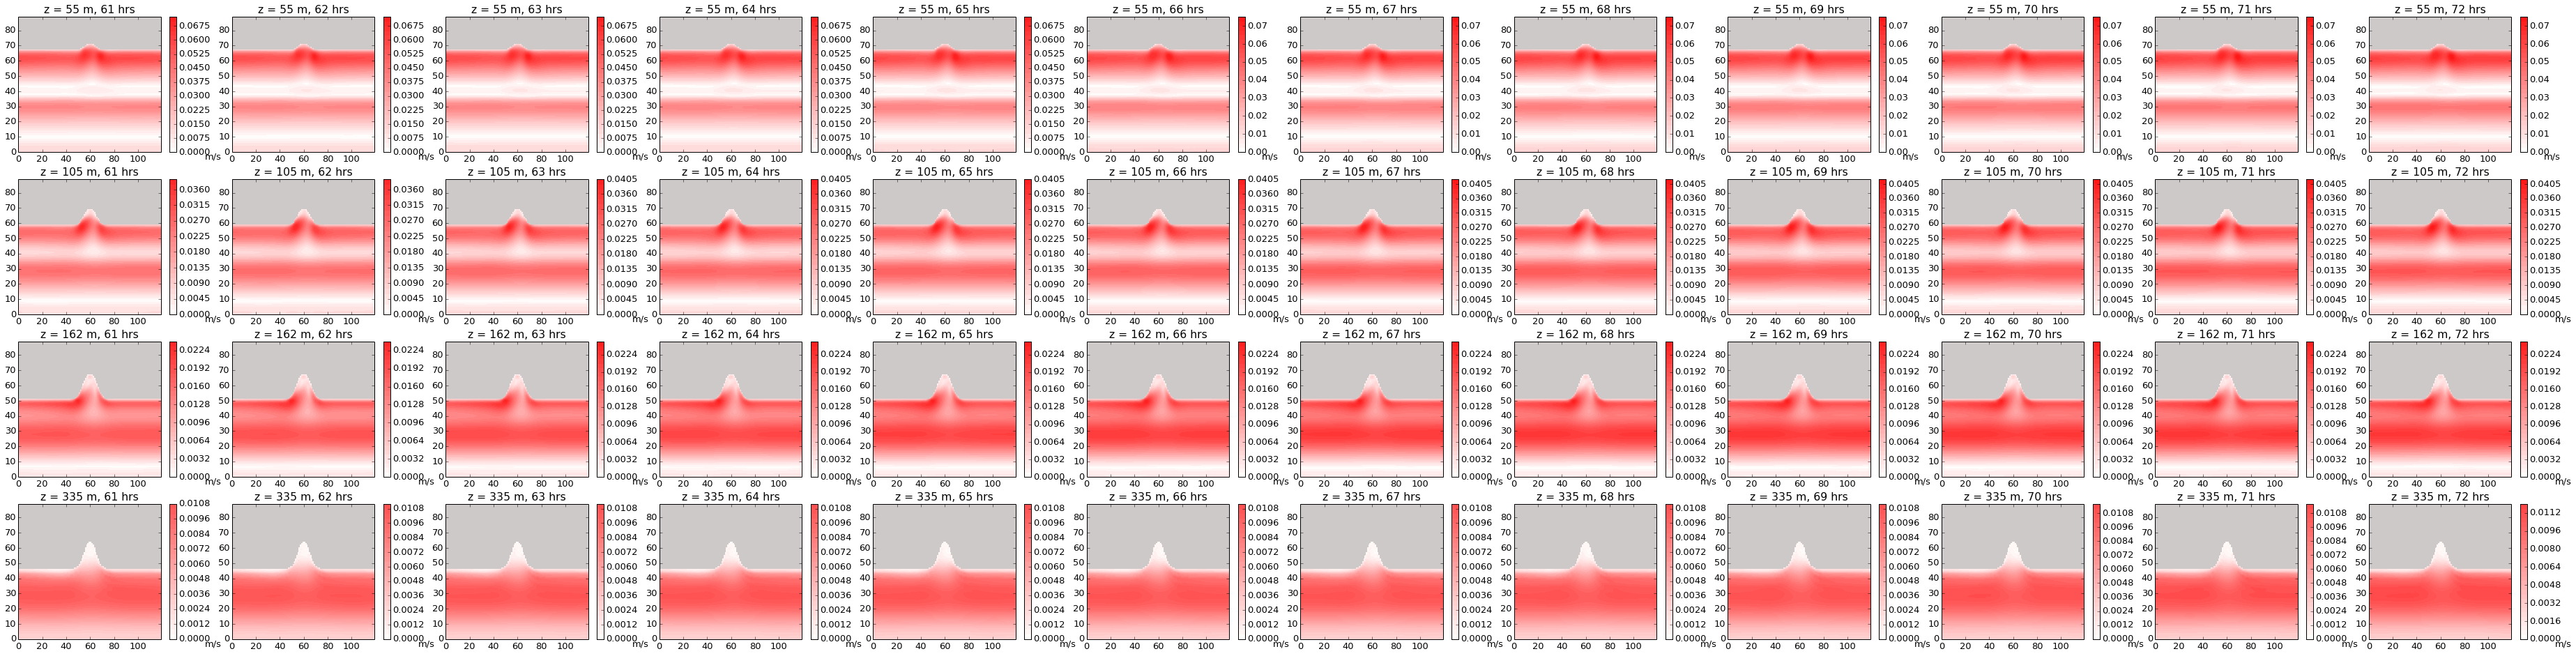

In [36]:
### PLOT QUIVER X-Y

colors = [(0.0,0.0,1,0), (1,1,1), (1.0,0.0,0.0)] #(red, white, blue)

y_slice = np.arange(0, ny-1)
x_slice = np.arange(0, nx-1)

arrow_step = 5
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

plt.rcParams.update({'font.size':13})

slices = [5,10,14,25]
tslices = [61,62,63,64,65,66,67,68,69,70,71,72]
kk=1

fig45=plt.figure(figsize=(65,16))

for ii in slices:
    for tt in tslices:
    
        #Uslice = umask[tt,ii,::arrow_step,::arrow_step]
        #Vslice = vmask[tt,ii,::arrow_step,::arrow_step]
        
        ##print(np.shape(Uslice))
        ##print(np.shape(Vslice))
        ##print(np.shape(x_slice_a))
        ##print(np.shape(y_slice_a))
        
        spd = np.sqrt(umask**2 + vmask**2)
        
        spdmin = np.min(spd[:,ii,:,:])
        spdmax = np.max(spd[:,ii,:,:])     
        
        pos = [0, abs(spdmin)/(abs(spdmin)+abs(spdmax)), 1] # to keep white color on zero
        
        plt.subplot(4,12,kk)
        
        ax=plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        plt.contourf(spd[tt,ii,:,:],NumLev,cmap=make_cmap(colors, position=pos),vmin= spdmin,vmax = spdmax)
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(0, 0),rotation=0)
        
        ##plt.quiver(x_slice_a,y_slice_a,Uslice,Vslice,pivot='middle')
        
        #plt.xlabel('X')
        
        #plt.ylabel('Y')
            
        plt.title("z = %d m, %d hrs" % (-z[ii],tt))
        kk=kk+1
